In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline


In [2]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0,
                   245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4,
     23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)


Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


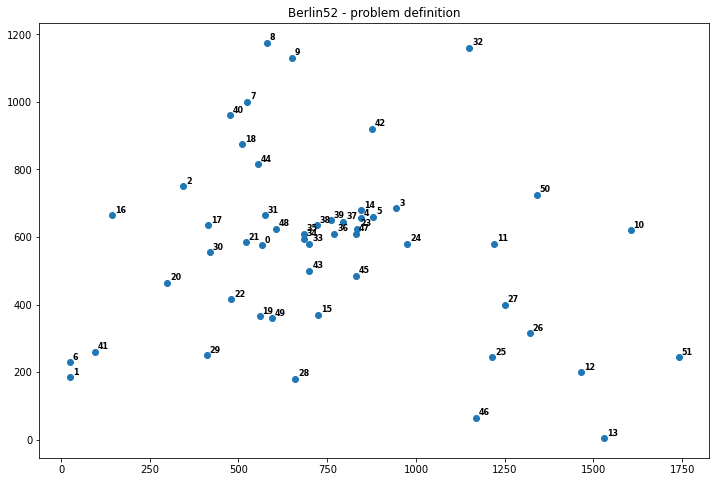

In [3]:
plt.figure(figsize=(12, 8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i),
             fontdict={'weight': 'bold', 'size': 8})

plt.title('Berlin52 - problem definition')

plt.show()


<Figure size 864x576 with 0 Axes>

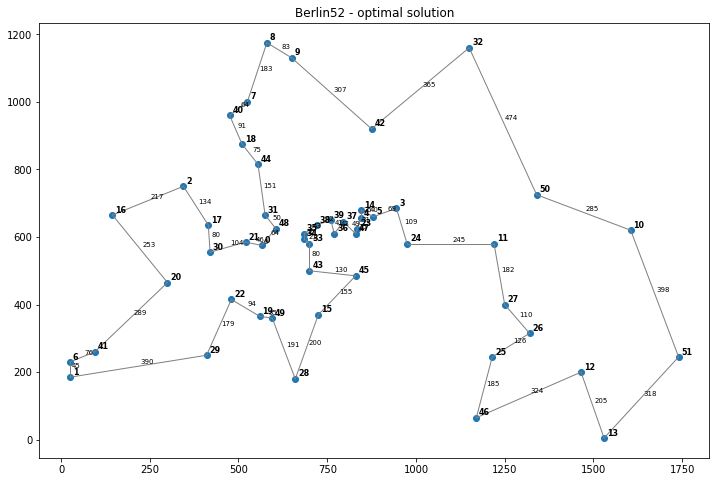

In [4]:
from matplotlib.lines import Line2D

route = p


def plot_route(route):
    plt.figure(figsize=(12, 8))
    fig, ax = plt.subplots(figsize=(12, 8))

    plt.plot(coords[:, 0], coords[:, 1], 'o')

    for i in range(n):
        plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i),
                 fontdict={'weight': 'bold', 'size': 8})

    ax.add_line(Line2D(
        [coords[0, 0], coords[route[0], 0]],
        [coords[0, 1], coords[route[0], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
             (coords[0, 1] + coords[route[0], 1])/2 + 6,
             '%d' % A[0, route[0]], fontdict={'weight': 'normal', 'size': 7})
    for i in range(1, len(route)):
        ax.add_line(Line2D(
            [coords[route[i-1], 0], coords[route[i], 0]],
            [coords[route[i-1], 1], coords[route[i], 1]],
            linewidth=1, color='gray'))
        plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
                 (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
                 '%d' % A[route[i-1], route[i]], fontdict={'weight': 'normal', 'size': 7})
    ax.add_line(Line2D(
        [coords[route[-1], 0], coords[0, 0]],
        [coords[route[-1], 1], coords[0, 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
             (coords[route[-1], 1] + coords[0, 1])/2 + 6,
             '%d' % A[route[-1], 0], fontdict={'weight': 'normal', 'size': 7})

    plt.title('Berlin52 - optimal solution')

    plt.show()

plot_route(route)


In [5]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s


In [6]:
print(tsp_objective_function(p), p)


7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


# Random sampling

In [8]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)


30.376996517181396
21141.762478330893 [ 4 32 33 11 10 15 28 13 27 29  1  2 45 39 48 47 19  3 49 43 24  5 37 38
 42 21 17 16  0 36  6 41 35 44  7  8 18 22 40  9 31 20 14 30 34 25 26 51
 50 46 12 23]


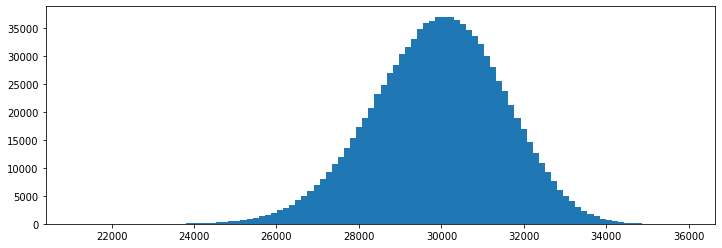

29911.021056260597 1579.3182501888791


In [9]:
plt.figure(figsize=(12, 4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())


# Simulated Annealing

In [10]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q


In [11]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = tsp_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = tsp_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())


25.707622051239014 9264.418112649646


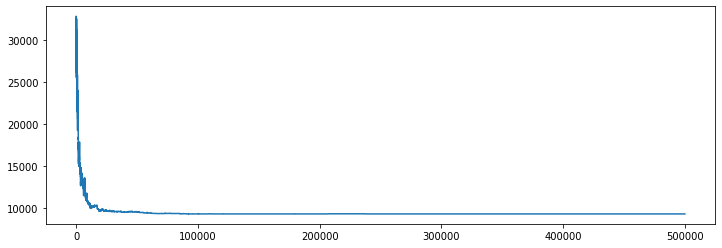

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(costs)
plt.show()


# SGA-PMX

In [13]:
def PMX(parent1, parent2, a = None, b = None):
    n = len(parent1)
    if a is None or b is None:
        a, b = np.random.randint(0, n, 2)
        if a > b:
            a, b = b, a

    children1 = [-1] * n
    children2 = [-1] * n

    children1[a: b + 1] = parent1[a: b + 1]
    children2[a: b + 1] = parent2[a: b + 1]

    used1 = set(children1)
    used2 = set(children2)

    lookup1 = [0] * n
    lookup2 = [0] * n

    for i in range(n): # for fast look up
        lookup1[parent1[i]] = i
        lookup2[parent2[i]] = i

    r = [i for i in range(a)] + [i for i in range(b, n)]

    for i in r:
        if children1[i] == -1:
            candidate = parent2[i]
            while candidate in used1:
                candidate = parent2[lookup1[candidate]]
            children1[i] = candidate
            used1.add(candidate)

        if children2[i] == -1:
            candidate = parent1[i]
            while candidate in used2:
                candidate = parent1[lookup2[candidate]]
            children2[i] = candidate
            used2.add(candidate)

    return children1, children2

# print(PMX([0,1,2,3,4,5,6,7,8], [8,2,6,7,1,5,4,0,3], 3, 6))
# print(PMX([8, 4, 7, 3, 6, 2, 5, 1, 9, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 3, 7))


In [14]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q


In [16]:
def tsp_objective_function(p, A):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s
    
def SGA(population_size=500,
        chromosome_length=n,
        crossover_probability=0.95,
        mutation_probability=0.25,
        number_of_iterations=201,
        crossover=PMX,
        mutation=reverse_sequence_mutation,
        distance_matrix=A,
        objective_function=tsp_objective_function,
        debug=True):

    number_of_offspring = population_size
    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    cost_values = []

    # generating an initial population
    current_population = np.zeros(
        (population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = objective_function(
            current_population[i, :], distance_matrix)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(
            population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros(
            (number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = \
                    crossover(current_population[parent_indices[2*i], :].copy(),
                              current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i,
                                    :] = current_population[parent_indices[2*i], :].copy()
                children_population[2*i+1,
                                    :] = current_population[parent_indices[2*i+1]].copy()

        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1,
                                :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = objective_function(
                children_population[i, :], distance_matrix)

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack(
            [objective_values, children_objective_values])
        current_population = np.vstack(
            [current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        cost_values.append(
            [objective_values.min(), objective_values.mean(), objective_values.max()])

        if t % 10 == 0 and debug:
            print(f'iteration: {t} - time: {time.time() - time0:.2f} - min: {objective_values.min():.2f} - mean: {objective_values.mean():.2f} - max: {objective_values.max():.2f} - std: {objective_values.std():.2f}')

    return cost_values, current_population


In [17]:
cost_values = [[8001]]
while cost_values[-1][0] > 8000:
   cost_values, current_population = SGA()


iteration: 0 - time: 0.07 - min: 23906.18 - mean: 28463.03 - max: 29829.07 - std: 1068.26
iteration: 10 - time: 0.47 - min: 19628.44 - mean: 22190.44 - max: 22822.24 - std: 522.17
iteration: 20 - time: 0.87 - min: 17838.97 - mean: 19252.31 - max: 19731.00 - std: 383.48
iteration: 30 - time: 1.21 - min: 14351.18 - mean: 15536.83 - max: 15952.92 - std: 274.73
iteration: 40 - time: 1.55 - min: 13253.36 - mean: 14181.26 - max: 14402.19 - std: 211.84
iteration: 50 - time: 1.89 - min: 12187.86 - mean: 12759.41 - max: 12896.71 - std: 135.17
iteration: 60 - time: 2.24 - min: 10829.10 - mean: 11214.43 - max: 11346.18 - std: 107.13
iteration: 70 - time: 2.57 - min: 9846.20 - mean: 10158.67 - max: 10257.07 - std: 66.65
iteration: 80 - time: 2.90 - min: 9199.74 - mean: 9338.10 - max: 9357.47 - std: 23.79
iteration: 90 - time: 3.24 - min: 8848.27 - mean: 8919.12 - max: 8961.05 - std: 13.84
iteration: 100 - time: 3.57 - min: 8437.51 - mean: 8460.74 - max: 8464.30 - std: 6.48
iteration: 110 - time: 3

<Figure size 864x576 with 0 Axes>

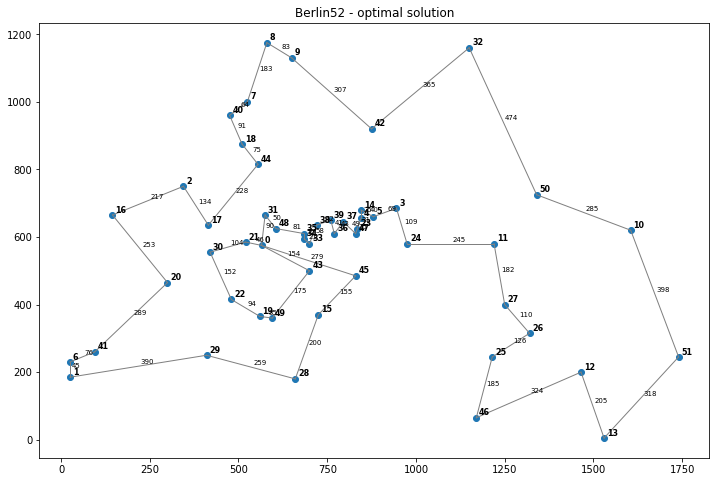

In [18]:
plot_route(current_population[0])


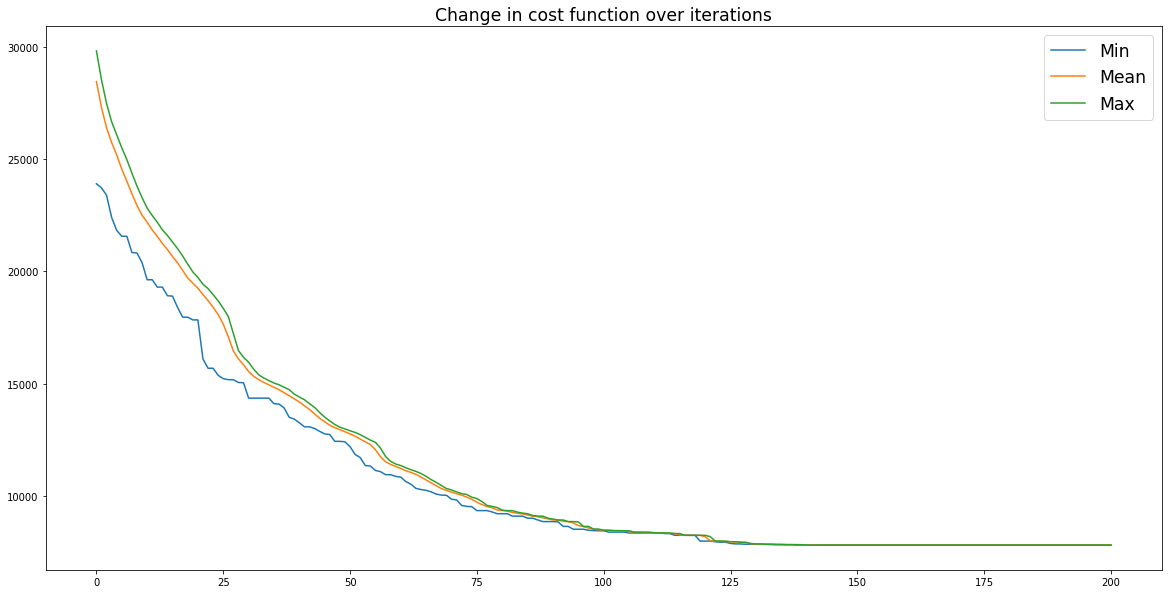

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(cost_values)
plt.title('Change in cost function over iterations', fontsize='xx-large')
plt.legend(['Min', 'Mean', 'Max'], fontsize='xx-large')
plt.show()


In [20]:
def random_swap_mutation(p):
    i,j = np.random.choice(len(p), size=2, replace=False)
    p[i], p[j] = p[j], p[i]
    return p

# PMX + random swap - score around 9-10 thousand

In [22]:
cost_values, current_population = SGA(mutation=random_swap_mutation)


iteration: 0 - time: 0.09 - min: 25264.67 - mean: 28517.71 - max: 29813.80 - std: 963.38
iteration: 10 - time: 0.44 - min: 19453.68 - mean: 22494.46 - max: 23240.77 - std: 618.73
iteration: 20 - time: 0.76 - min: 16357.89 - mean: 17789.99 - max: 18244.82 - std: 366.71
iteration: 30 - time: 1.08 - min: 13840.19 - mean: 14819.63 - max: 15176.70 - std: 283.79
iteration: 40 - time: 1.41 - min: 12314.73 - mean: 13094.65 - max: 13352.40 - std: 218.65
iteration: 50 - time: 1.74 - min: 11472.98 - mean: 11894.40 - max: 11994.34 - std: 91.20
iteration: 60 - time: 2.07 - min: 10818.40 - mean: 11065.14 - max: 11136.16 - std: 64.14
iteration: 70 - time: 2.39 - min: 10570.50 - mean: 10659.76 - max: 10676.05 - std: 30.50
iteration: 80 - time: 2.71 - min: 10487.34 - mean: 10491.59 - max: 10502.62 - std: 3.70
iteration: 90 - time: 3.04 - min: 10471.11 - mean: 10475.42 - max: 10487.34 - std: 6.35
iteration: 100 - time: 3.36 - min: 10431.04 - mean: 10431.73 - max: 10434.66 - std: 1.43
iteration: 110 - ti

<Figure size 864x576 with 0 Axes>

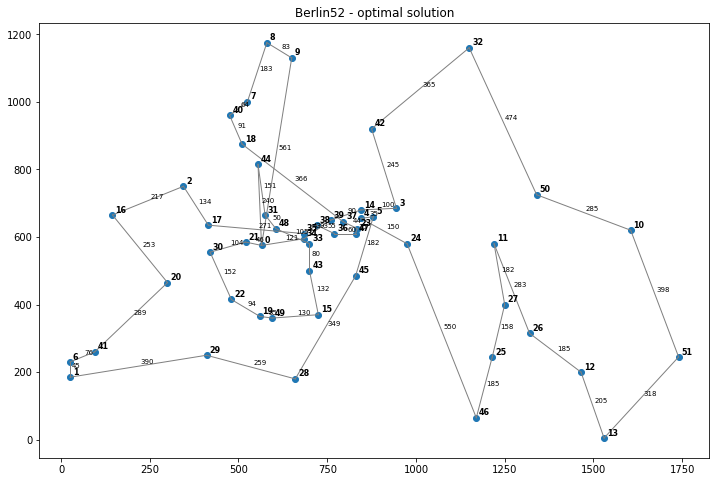

In [23]:
plot_route(current_population[0])

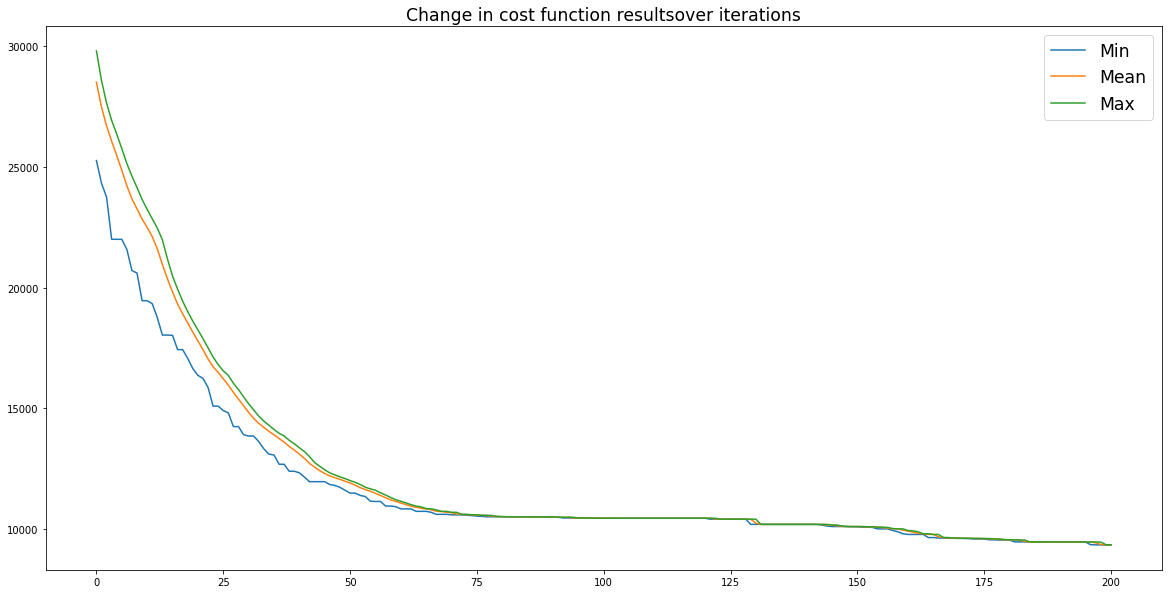

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(cost_values)
plt.title('Change in cost function resultsover iterations', fontsize='xx-large')
plt.legend(['Min', 'Mean', 'Max'], fontsize='xx-large')
plt.show()


# Other problems: bayg29, bays29, kroA100, kroA150, kroA200

In [25]:
from bayg29 import bayg29
from bays29 import bays29
from kro import kroA100, kroA150, kroA200

instances = [('bayg29', bayg29()), ('bays29', bays29()), ('kroA100', kroA100()), ('kroA150', kroA150()), ('kroA200', kroA200())]
iters = [100, 100, 500, 700, 1000]

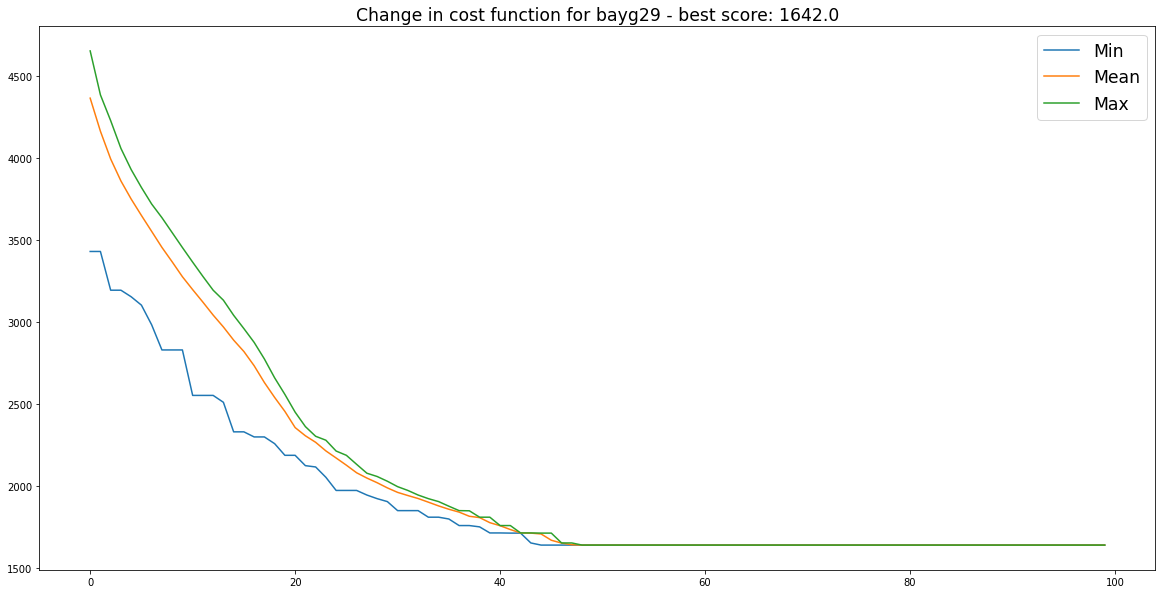

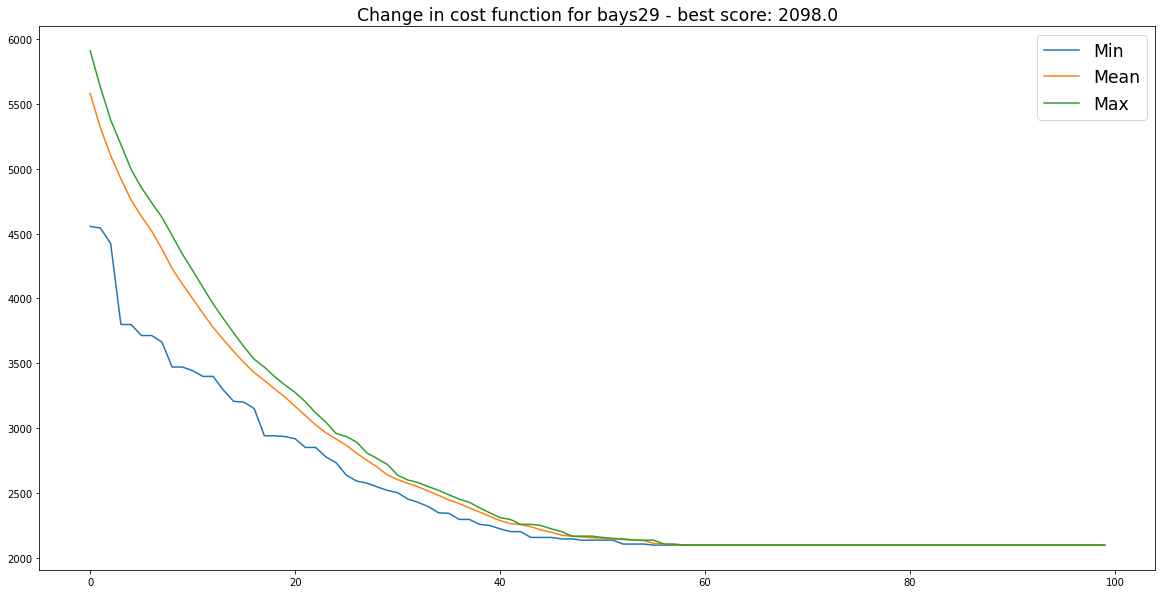

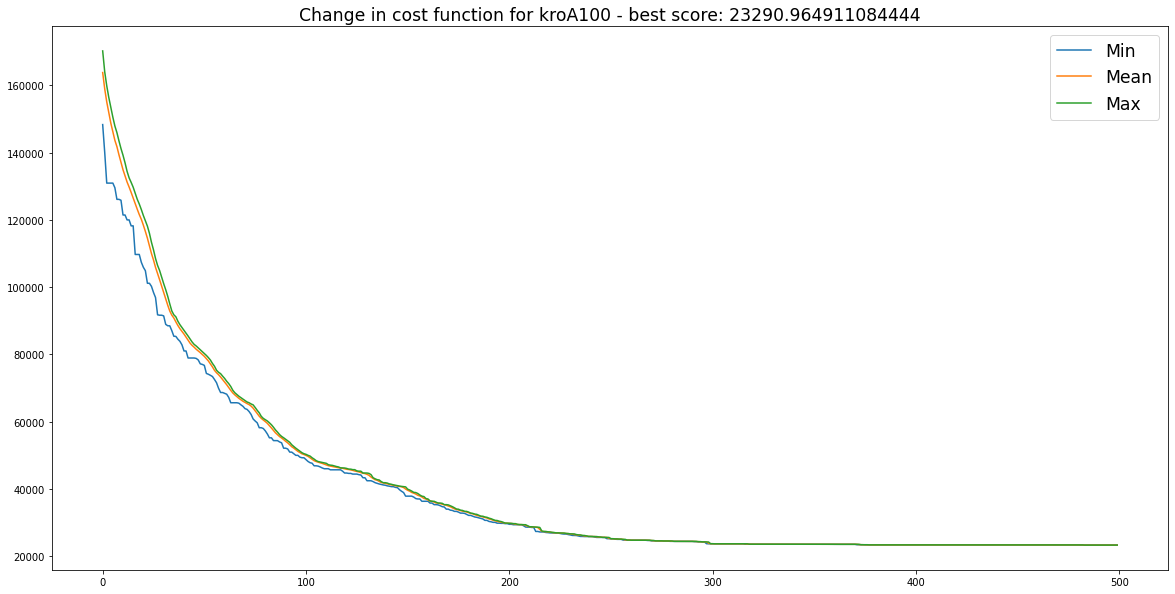

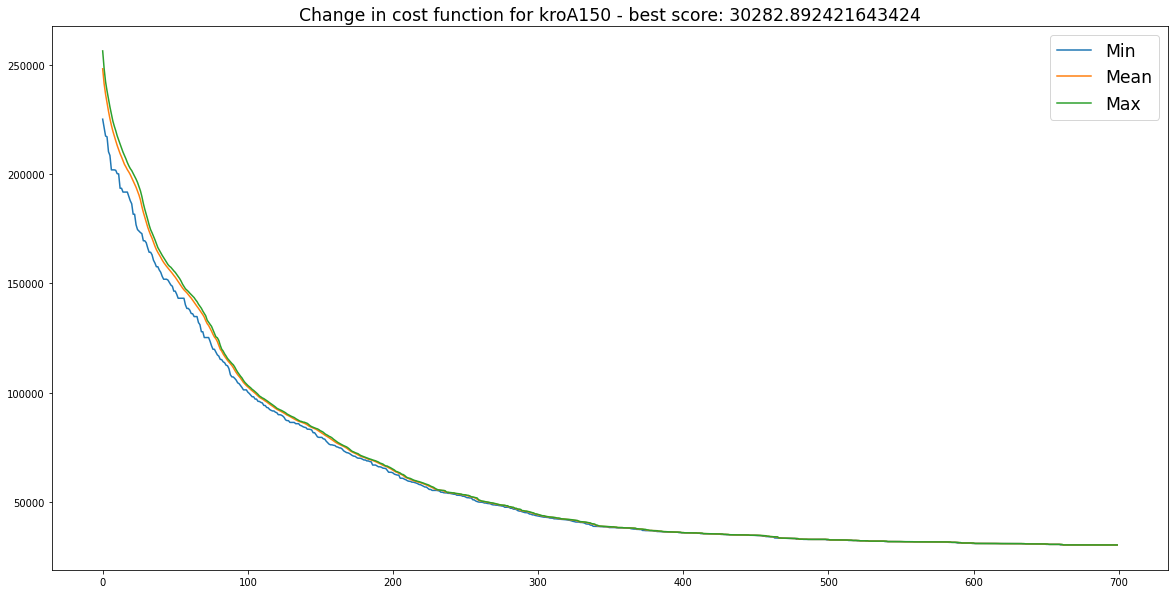

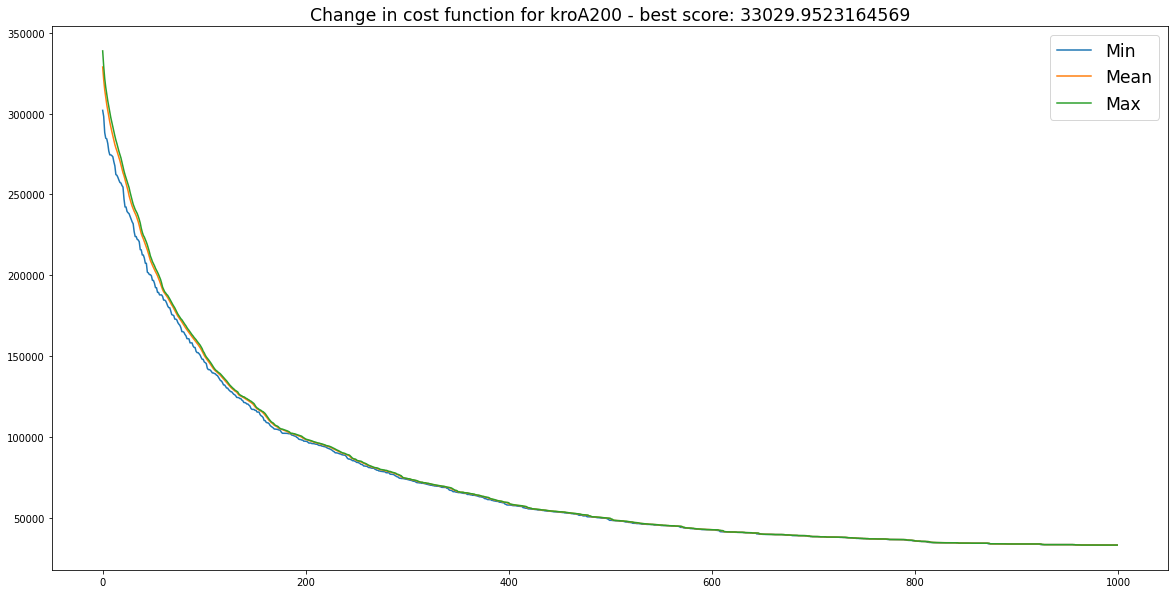

In [26]:
for i, (name, (A, n)) in enumerate(instances):
   cost_values, current_population = SGA(number_of_iterations=iters[i], distance_matrix=A, chromosome_length=n, debug=False)
   plt.figure(figsize=(20, 10))
   plt.plot(cost_values)
   plt.title(f'Change in cost function for {name} - best score: {cost_values[-1][0]}', fontsize='xx-large')
   plt.legend(['Min', 'Mean', 'Max'], fontsize='xx-large')
   plt.show()


# Task 2

## Crossovers

### OX
![OX](OX.png)

### CX
![CX](CX.png)

### PBX
![PBX](PBX.png)

### PPX
![PPX](PPX.png)

In [27]:
def OX(parent1, parent2, a = None, b = None):
    n = len(parent1)
    if a == None or b == None:
       a, b = np.random.randint(0, n, 2)
       if a > b:
           a, b = b, a

    child1 = [-1] * n
    child2 = [-1] * n

    child1[a: b + 1] = parent1[a: b + 1]
    child2[a: b + 1] = parent2[a: b + 1]

    used1 = set(child1)
    used2 = set(child2)

    avaliable1 = [x for x in parent1[b+1:] if x not in used2] + \
        [x for x in parent1[:b+1] if x not in used2]
    avaliable2 = [x for x in parent2[b+1:] if x not in used1] + \
        [x for x in parent2[:b+1] if x not in used1]

    pointer = 0
    for i in range(b + 1, n):
        child1[i] = avaliable2[pointer]
        child2[i] = avaliable1[pointer]
        pointer += 1

    for i in range(a):
        child1[i] = avaliable2[pointer]
        child2[i] = avaliable1[pointer]
        pointer += 1

    return child1, child2

# print(OX([8, 4, 7, 3, 6, 2, 5, 1, 9, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 3, 7))

def CX(parent1, parent2):
    n = len(parent1)

    cycles1 = []
    cycles2 = []
    lookup1 = [-1]*n
    lookup2 = [-1]*n
    child1 = [-1] * n
    child2 = [-1] * n
    for i in range(n):  # for fast look up
        lookup1[parent1[i]] = i
        lookup2[parent2[i]] = i
    
    used1 = []
    used2 = []
    
    start = 0 # child1
    while True:
        if start in used1: # find new start
            start += 1
            if start >= len(parent1):
                break
            continue

        currentCycle = []
        while True: # find next cycle
           used1.append(start)
           currentCycle.append(start)
           start = lookup2[parent1[start]]
           if start in currentCycle:
               break
        
        cycles1.append(currentCycle)
    
    start = 0 # child 2
    while True:
        if start in used2:  # find new start
            start += 1
            if start >= len(parent2):
                break
            continue

        currentCycle = []
        while True:  # find next cycle
           used2.append(start)
           currentCycle.append(start)
           start = lookup1[parent2[start]]
           if start in currentCycle:
               break

        cycles2.append(currentCycle)

    marker = 0
    for cycle in cycles1: # fill child1
        arrs = [parent1, parent2]
        for val in cycle:
            child1[val] = arrs[marker][val]
        marker = 1 - marker

    marker = 0
    for cycle in cycles2: # fill child 2
        arrs = [parent2, parent1]
        for val in cycle:
            child2[val] = arrs[marker][val]
        marker = 1 - marker

    return child1, child2

# print(CX([8, 4, 7, 3, 6, 2, 5, 1, 9, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))


def PBX(parent1, parent2):
    n = len(parent1)
    r1 = np.random.rand(n)
    r2 = np.random.rand(n)

    child1 = [-1] * n
    child2 = [-1] * n

    for i in range(n):
        if (r1 < 0.5)[i]:
            child1[i] = parent1[i]
        if (r2 < 0.5)[i]:
            child2[i] = parent2[i]

    used1 = set(parent1[r1 < 0.5])
    used2 = set(parent2[r2 < 0.5])

    available1 = [x for x in parent2 if x not in used1]
    available2 = [x for x in parent1 if x not in used2]

    pointer1 = 0
    pointer2 = 0
    for i in range(n):
        if child1[i] == -1:
            child1[i] = available1[pointer1]
            pointer1 += 1

        if child2[i] == -1:
            child2[i] = available2[pointer2]
            pointer2 += 1

    return child1, child2


def PPX(parent1, parent2):
    n = len(parent1)
    r = np.random.randint(0,2, n)

    child1 = [-1] * n
    child2 = [-1] * n
    parents = [parent1, parent2]
    pointers = [0,0]
    used_for_child1 = set()
    used_for_child2 = set()

    for i in range(n):
        while parents[r[i]][pointers[r[i]]] in used_for_child1:
            pointers[r[i]] += 1
        child1[i] = parents[r[i]][pointers[r[i]]]
        used_for_child1.add(child1[i])
    
    pointers = [0,0]
    for i in range(n):
        while parents[1 - r[i]][pointers[1 - r[i]]] in used_for_child2:
            pointers[1 - r[i]] += 1
        child2[i] = parents[1 - r[i]][pointers[1 - r[i]]]
        used_for_child2.add(child2[i])

    return child1, child2


# print(PPX(np.array([8, 1, 2, 3, 4, 5, 6, 7, 9, 0]),
#           np.array([0, 4, 7, 3, 6, 2, 5, 1, 8, 9])))

# print(PBX(np.array([8, 1, 2, 3, 4, 5, 6, 7, 9, 0]), np.array([0, 4, 7, 3, 6, 2, 5, 1, 8, 9])))


## Mutation

### Shift mutation
![SM](SM.png)

In [28]:
def SM(p):
   n = len(p)
   k = np.random.randint(1, n-1, 1)[0]
   ans1 = p[:n - k]
   ans2 = p[n - k:]

   return np.append(ans2, ans1)

In [29]:
crossovers = [(PMX, 'PMX'), (OX, 'OX'), (CX,'CX'), (PBX,'PBX'), (PPX, 'PPX')]
mutations = [(reverse_sequence_mutation, "reverse sequence"), (random_swap_mutation, 'random swap'), (SM, 'shift')]
n = 52 # BERLIN 52
coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0,
                   245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())


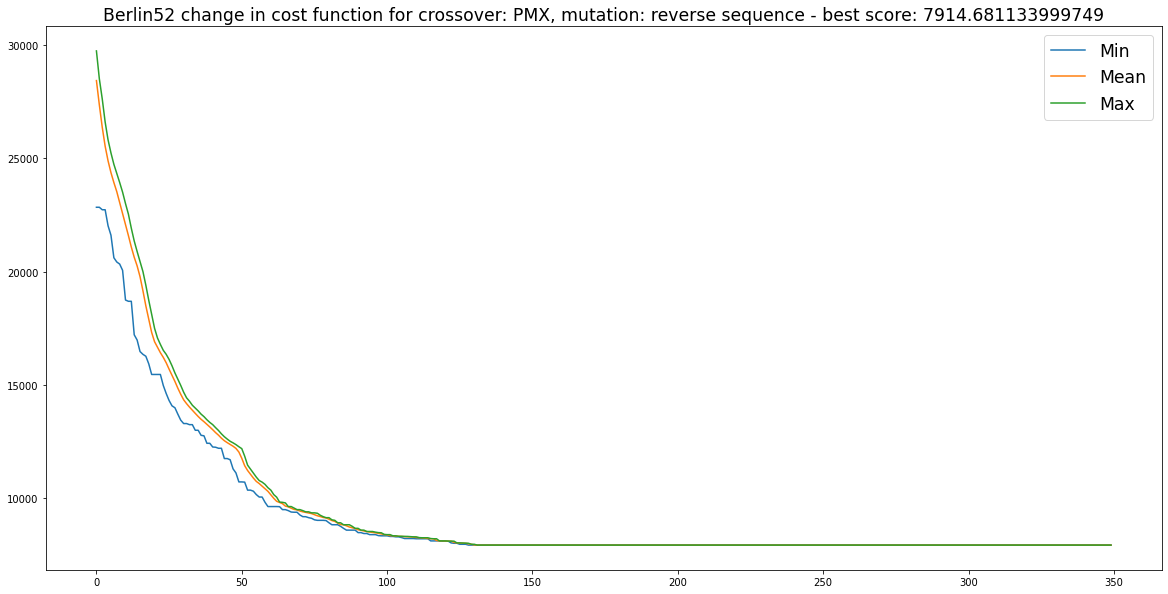

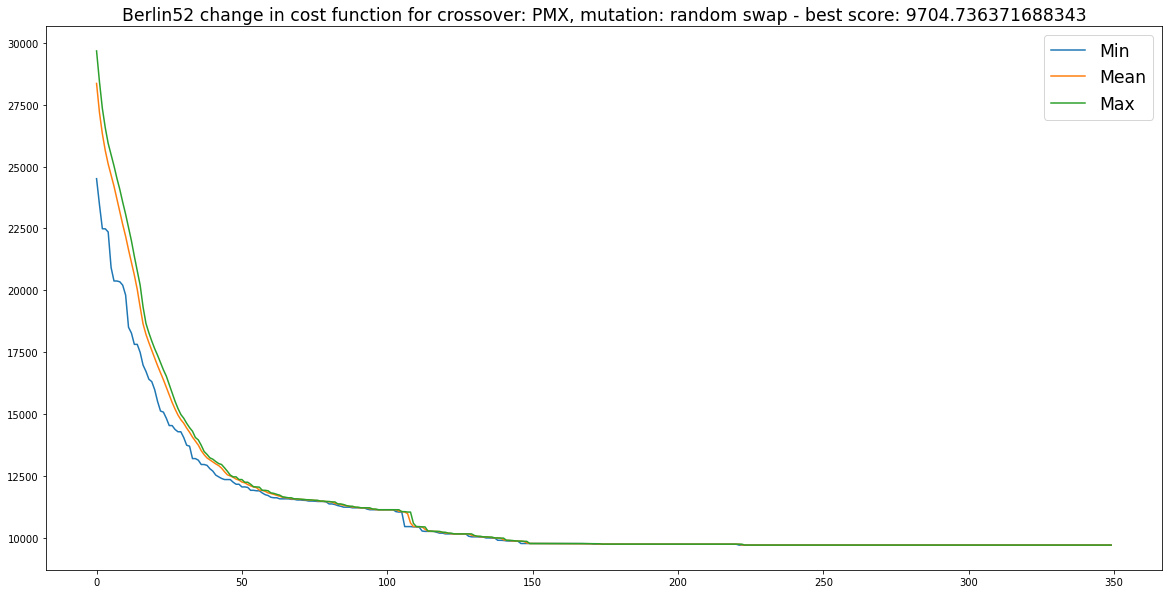

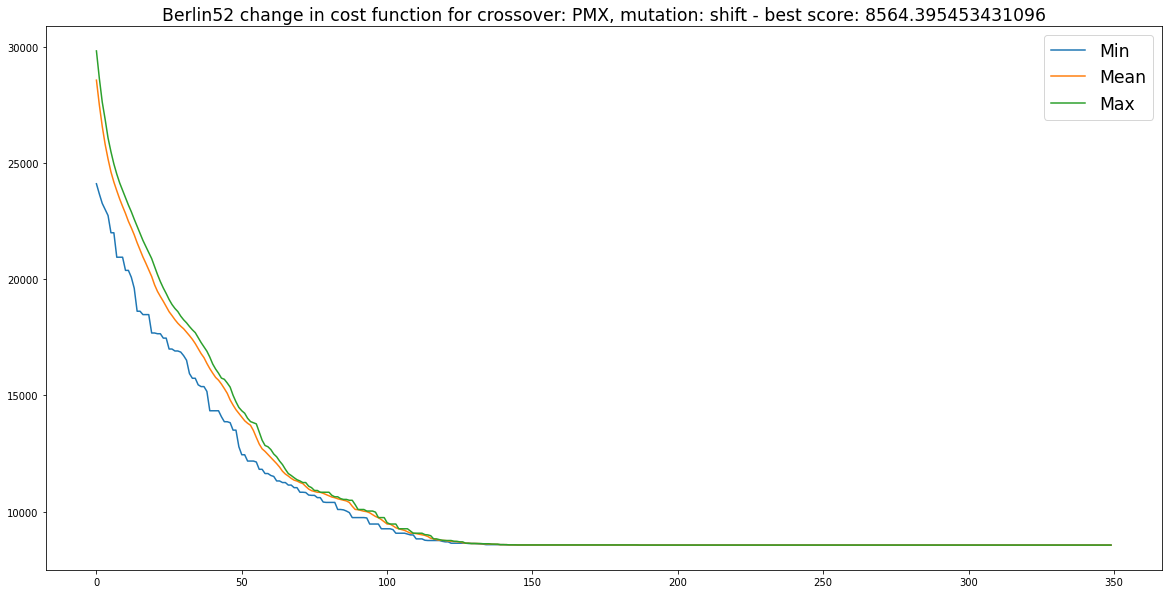

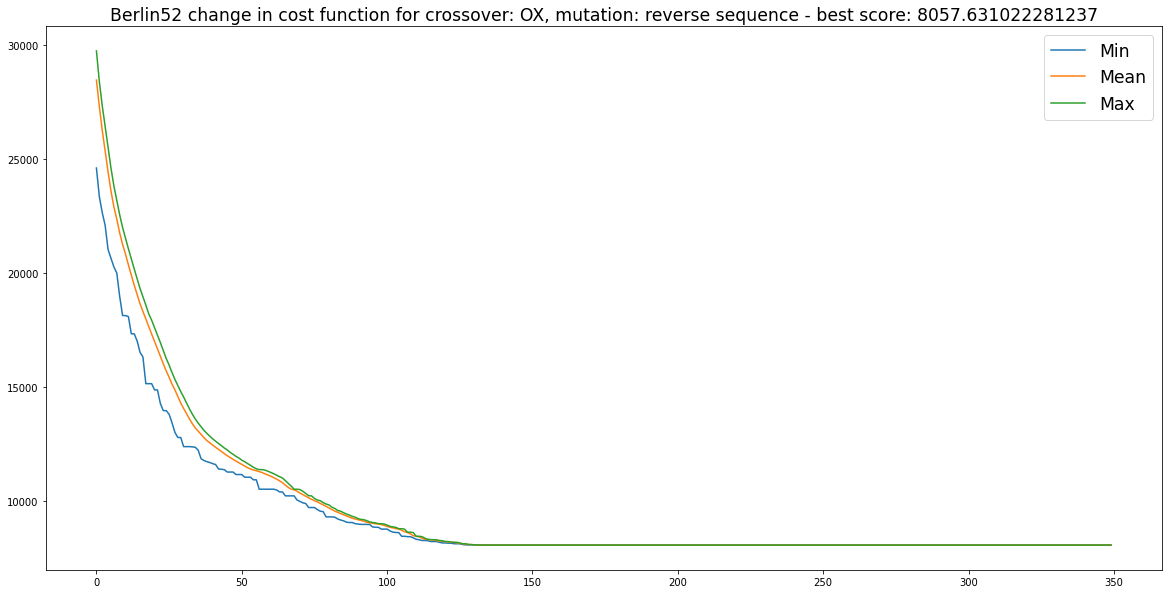

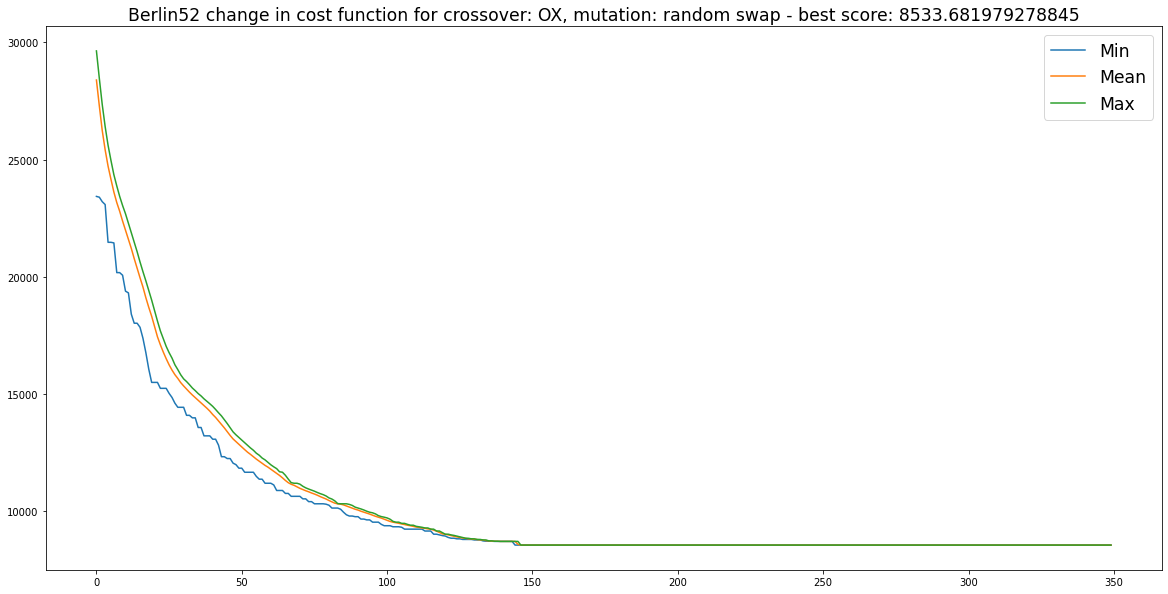

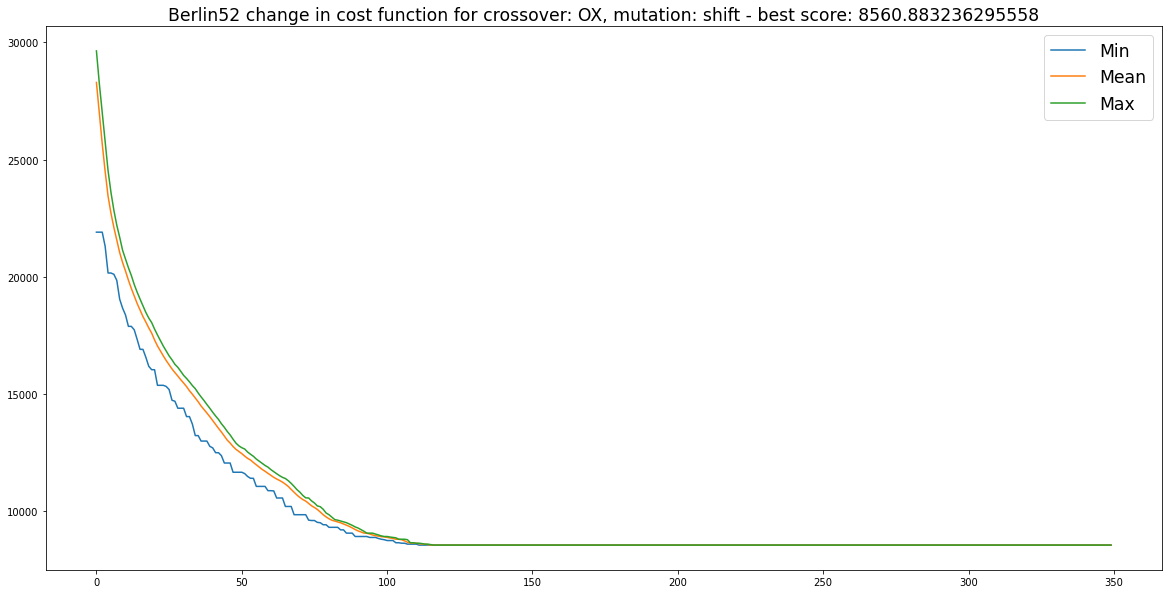

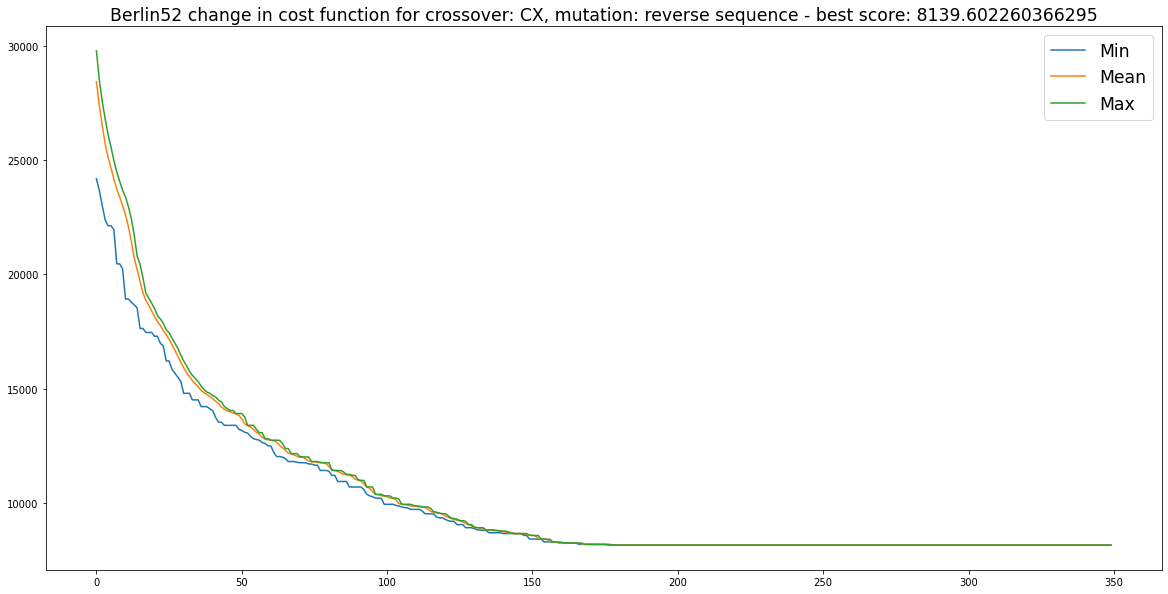

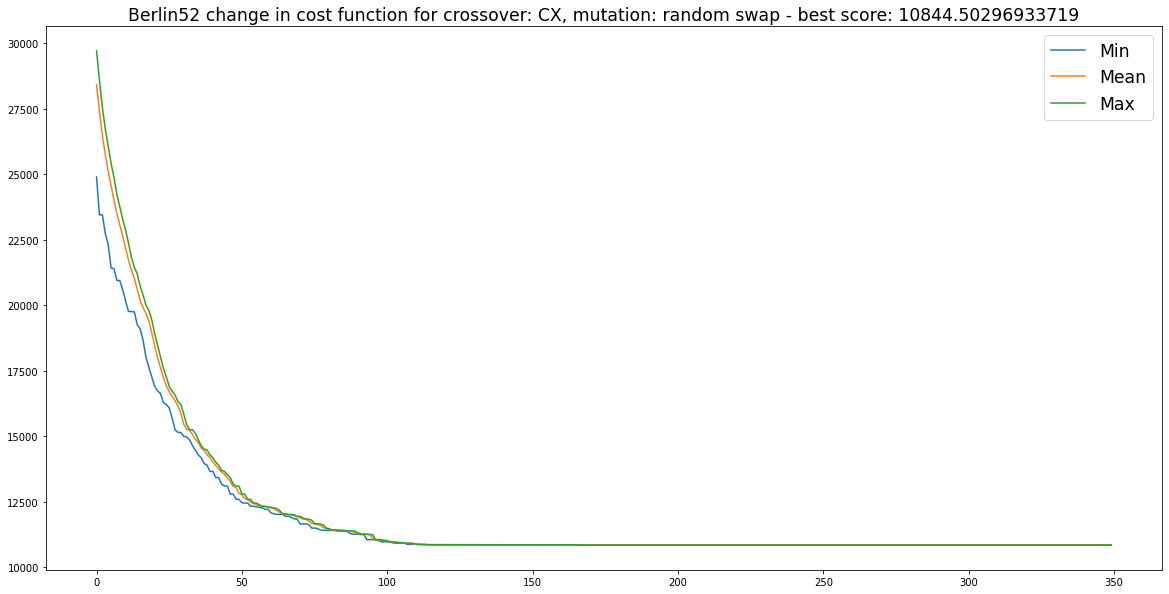

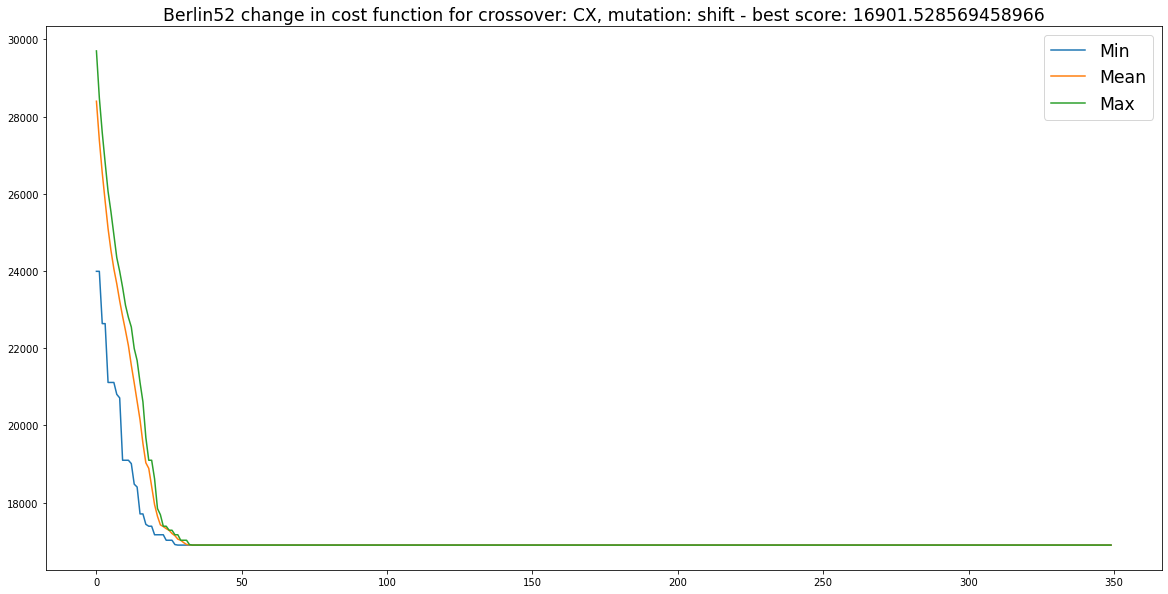

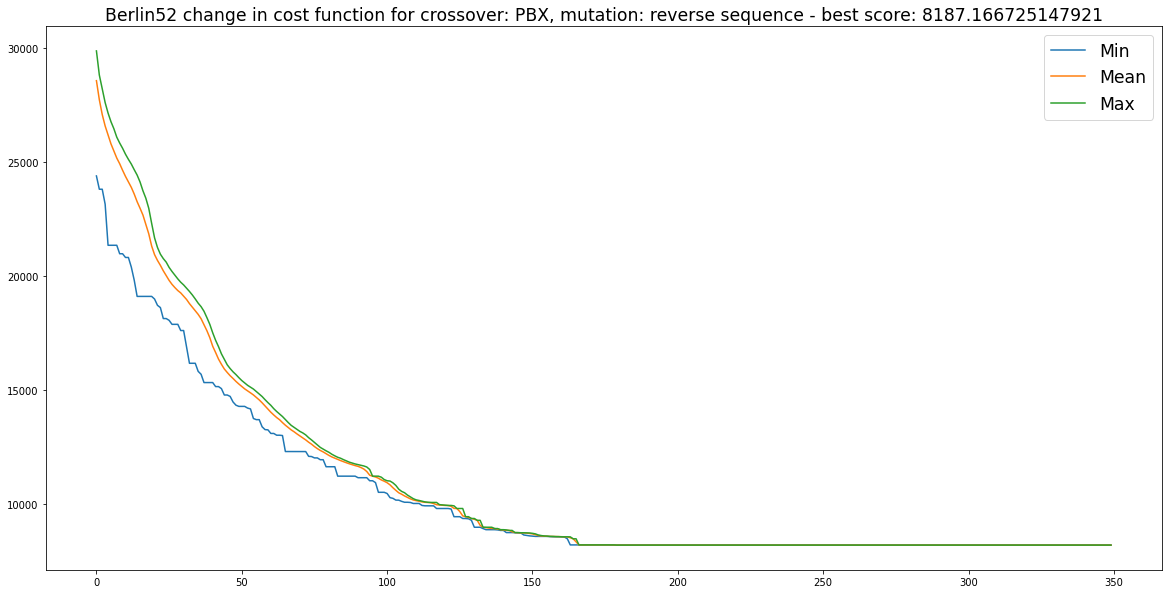

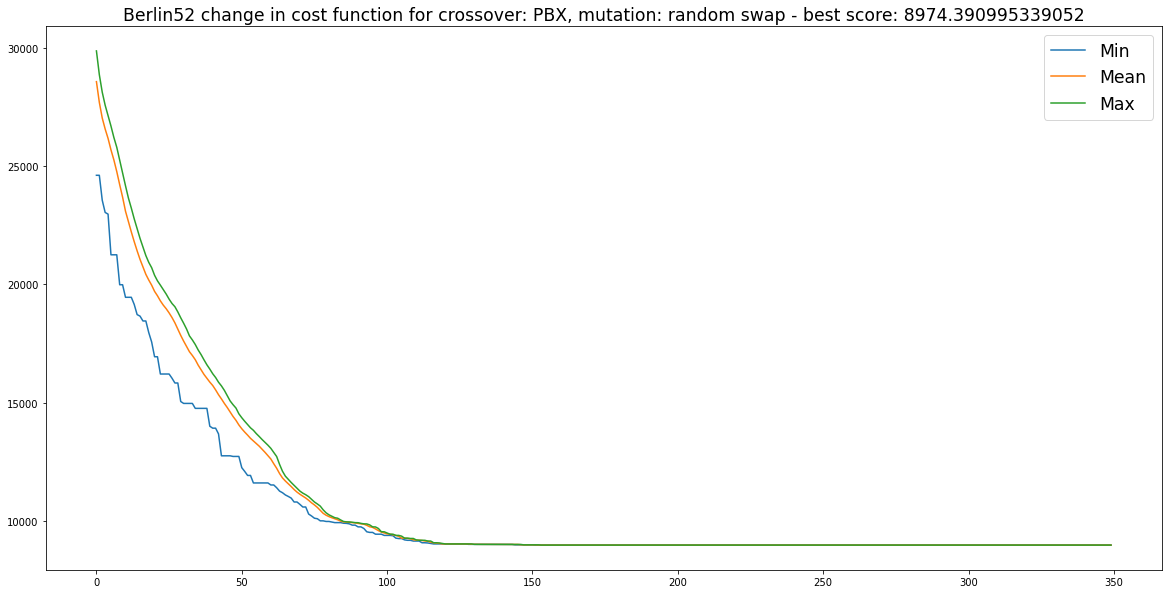

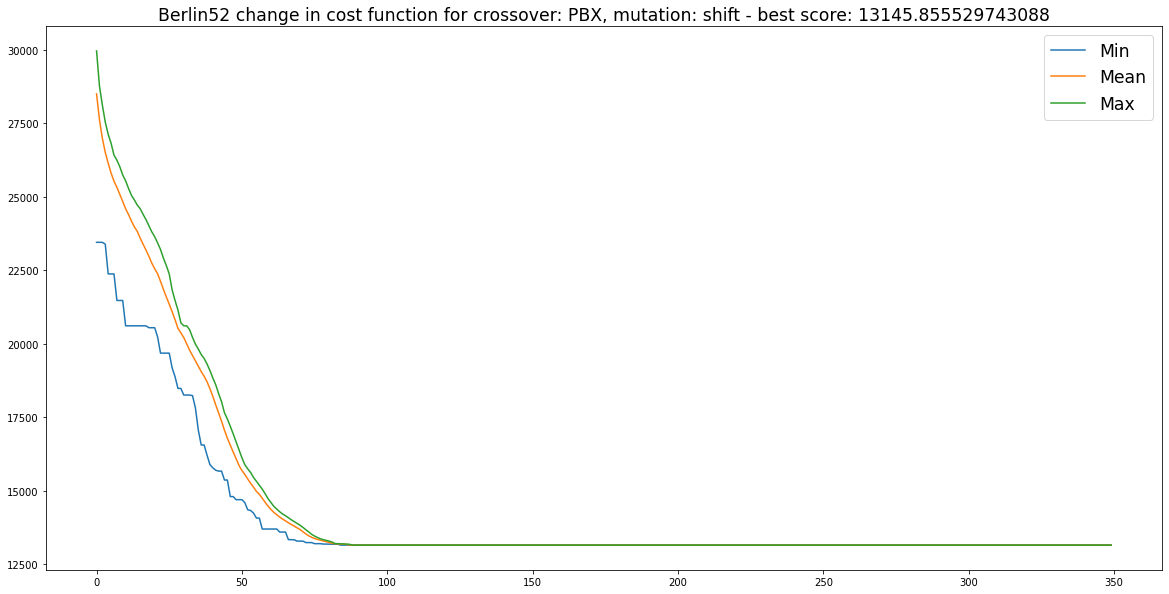

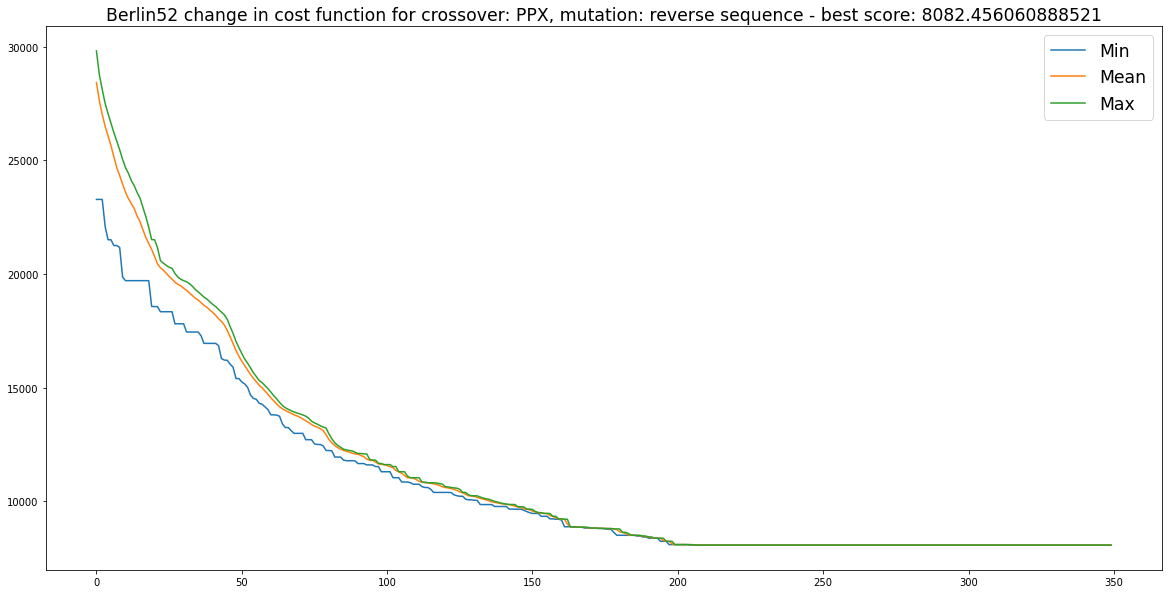

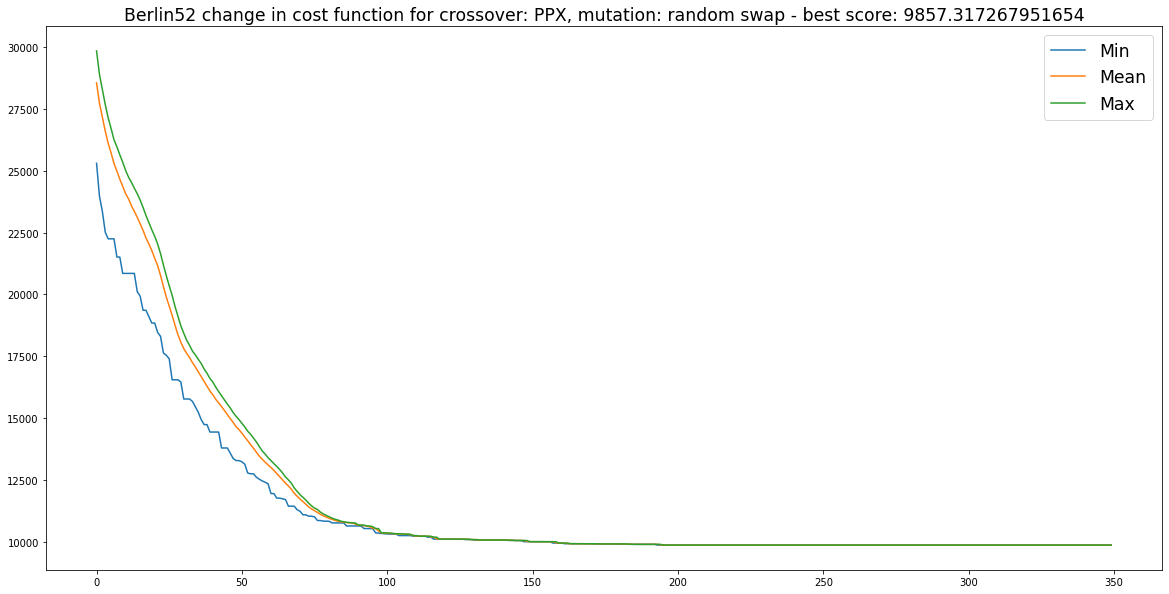

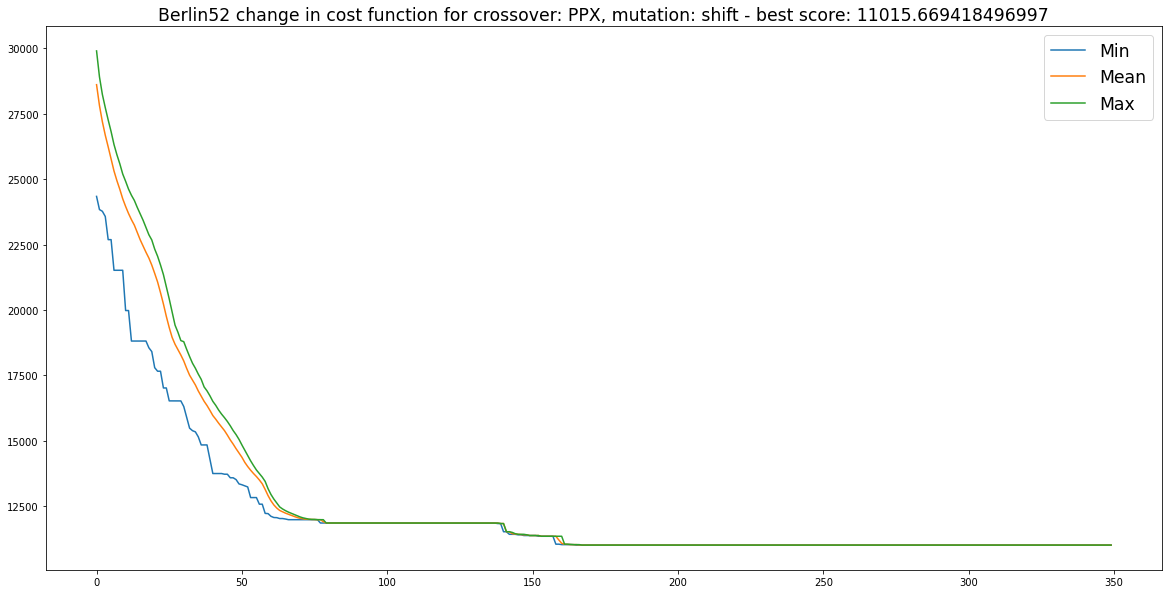

In [30]:
for i, (c_function, c_name) in enumerate(crossovers):
    for j, (m_function, m_name) in enumerate(mutations):
        cost_values_final = []
        best = 1e8
        for i in range(5):
           cost_values, current_population = SGA(number_of_iterations=350,
                                                 distance_matrix=A,
                                                 chromosome_length=n,
                                                 crossover=c_function,
                                                 mutation=m_function,
                                                 debug=False)
           time.sleep(1)

           if cost_values[-1][0] < best:
               best = cost_values[-1][0]
               cost_values_final = cost_values
        plt.figure(figsize=(20, 10))
        plt.plot(cost_values)
        plt.title(
            f'Berlin52 change in cost function for crossover: {c_name}, mutation: {m_name} - best score: {cost_values[-1][0]}', fontsize='xx-large')
        plt.legend(['Min', 'Mean', 'Max'], fontsize='xx-large')
        plt.show()       


# Task 3

In [31]:
def get_permutations(p, k=1):
    if k == 0:
        return p
    permutations = [p]
    for i in range(len(p)):
        for j in range(i+1, len(p)):
            q = p.copy()
            q[i], q[j] = q[j], q[i]
            permutations.append(q)

    p_s = [get_permutations(s, k-1) for s in permutations]

    return p_s

def local_search_mutation(p, k, A):
    perms = get_permutations(p, k)
    scores = np.array([tsp_objective_function(x, A) for x in perms])
    best = perms[scores.argmin()]
    return best


res = local_search_mutation(np.arange(0, 52), 1, A)
# print(res, tsp_objective_function(res, A))

def localsearch_mutation_iterative(p, A, k=1):
    curr_score = tsp_objective_function(p, A)
    curr_best = p
    candidate = local_search_mutation(p, k, A)
    s = tsp_objective_function(candidate, A)

    while s < curr_score:
        curr_score, curr_best = s, candidate
        candidate = local_search_mutation(curr_best, k, A)
        s = tsp_objective_function(candidate, A)
    return curr_best

res = localsearch_mutation_iterative(np.arange(0, 52), A, 1)
# print(res, tsp_objective_function(res, A))


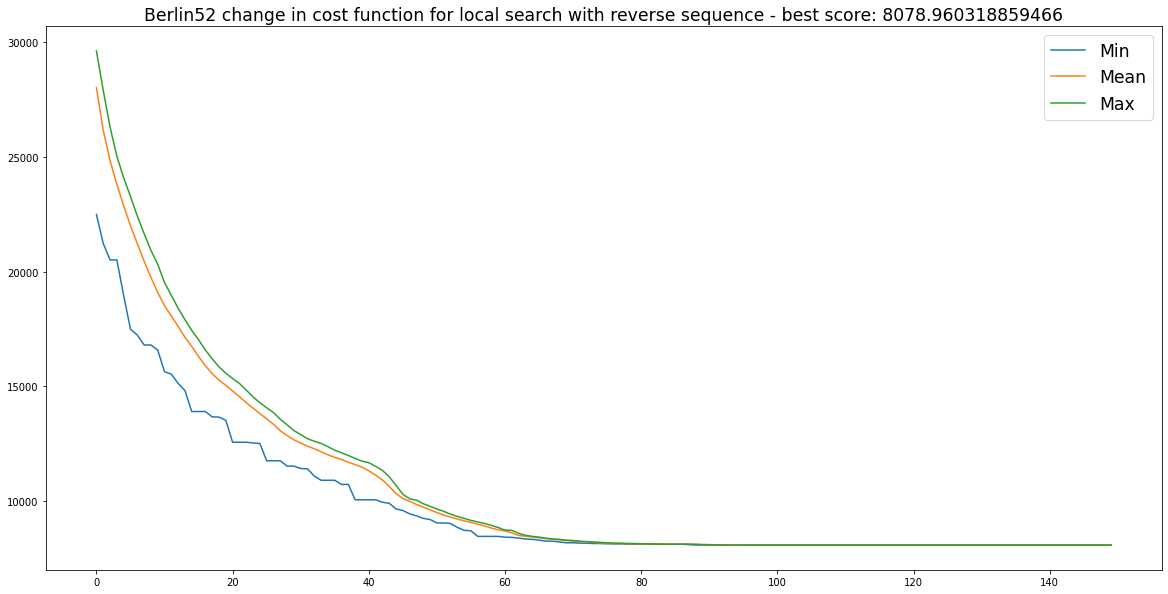

In [32]:
cost_values, current_population = SGA(number_of_iterations=150,
                                     distance_matrix=A,
                                     chromosome_length=n,
                                     crossover=PMX,
                                     mutation=lambda x: local_search_mutation(reverse_sequence_mutation(x), 1, A),
                                     debug=False)

plt.figure(figsize=(20, 10))
plt.plot(cost_values)
plt.title(
f'Berlin52 change in cost function for local search with reverse sequence - best score: {cost_values[-1][0]}', fontsize='xx-large')
plt.legend(['Min', 'Mean', 'Max'], fontsize='xx-large')
plt.show()


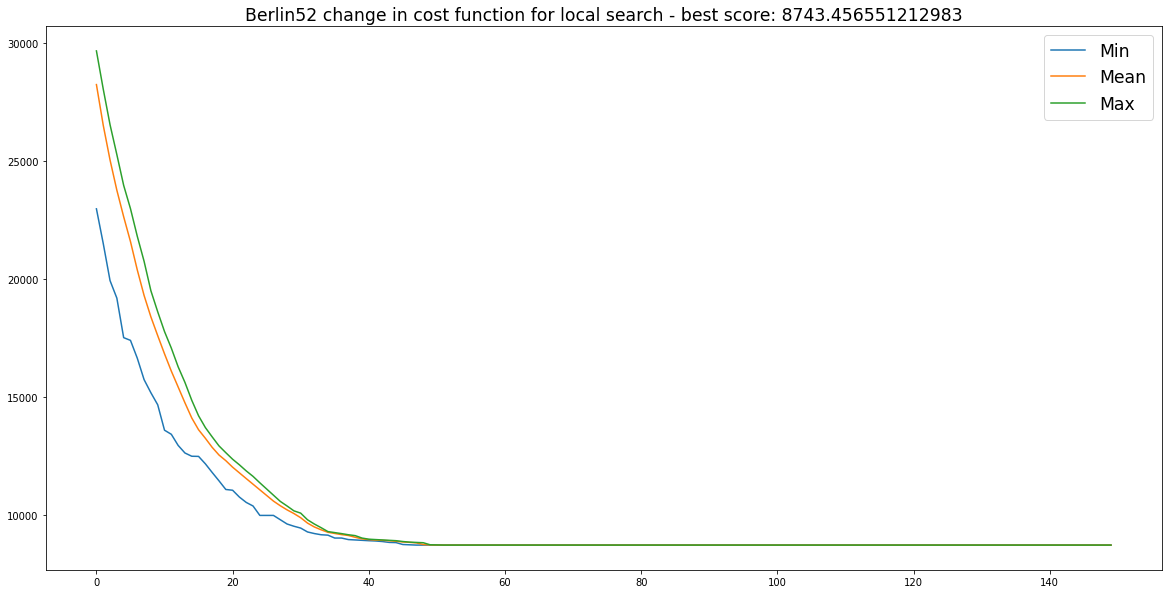

In [33]:
cost_values, current_population = SGA(number_of_iterations=150,
                                      distance_matrix=A,
                                      chromosome_length=n,
                                      crossover=PMX,
                                      mutation=lambda x: local_search_mutation(x, 1, A),
                                      debug=False)

plt.figure(figsize=(20, 10))
plt.plot(cost_values)
plt.title(
    f'Berlin52 change in cost function for local search - best score: {cost_values[-1][0]}', fontsize='xx-large')
plt.legend(['Min', 'Mean', 'Max'], fontsize='xx-large')
plt.show()


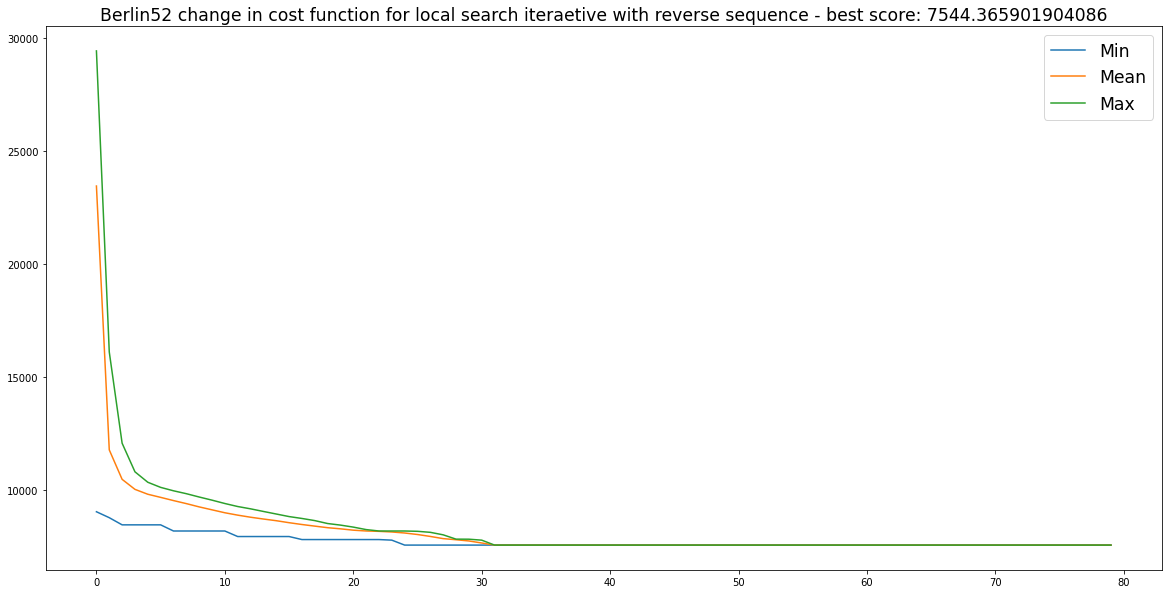

In [34]:
cost_values, current_population = SGA(number_of_iterations=80,
                                      distance_matrix=A,
                                      chromosome_length=n,
                                      crossover=PMX,
                                      mutation=lambda x: localsearch_mutation_iterative(reverse_sequence_mutation(x), A, 1),
                                      debug=False)

plt.figure(figsize=(20, 10))
plt.plot(cost_values)
plt.title(
    f'Berlin52 change in cost function for local search iteraetive with reverse sequence - best score: {cost_values[-1][0]}', fontsize='xx-large')
plt.legend(['Min', 'Mean', 'Max'], fontsize='xx-large')
plt.show()


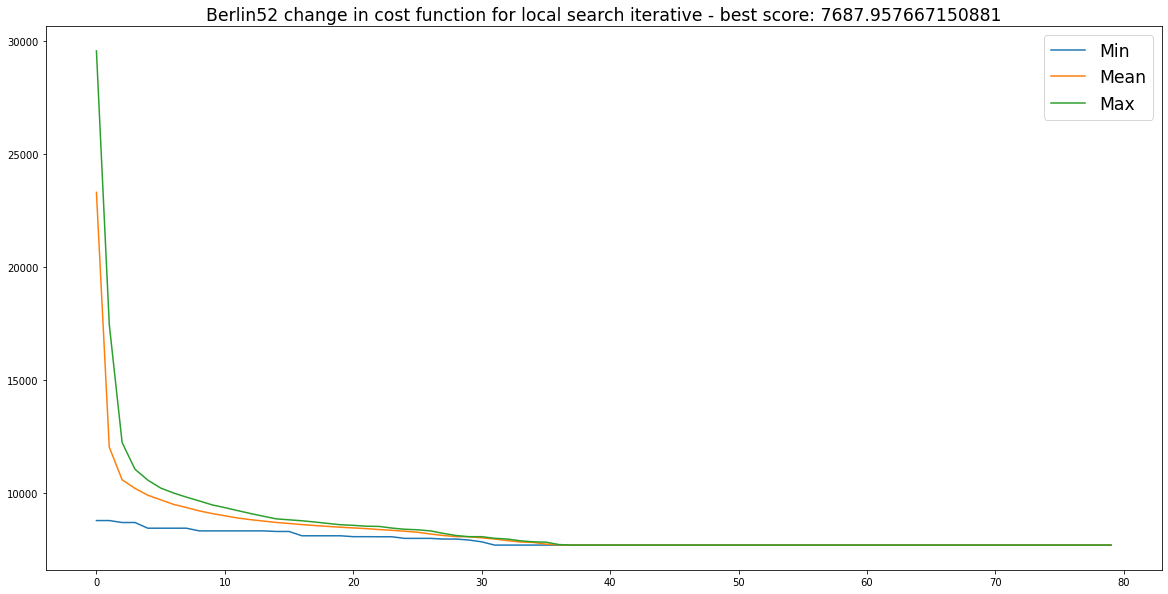

In [35]:
cost_values, current_population = SGA(number_of_iterations=80,
                                      distance_matrix=A,
                                      chromosome_length=n,
                                      crossover=PMX,
                                      mutation=lambda x: localsearch_mutation_iterative(x, A, 1),
                                      debug=False)

plt.figure(figsize=(20, 10))
plt.plot(cost_values)
plt.title(
    f'Berlin52 change in cost function for local search iterative - best score: {cost_values[-1][0]}', fontsize='xx-large')
plt.legend(['Min', 'Mean', 'Max'], fontsize='xx-large')
plt.show()


# Task 4 - QAP


In [54]:
def qap_objective_function(p, A, B):
    n = len(p)
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s


In [57]:
def get_qap_instance(qap_filename):
   with open(f'../Lab1/QAPdata/{qap_filename}') as qap_instance_file:
      line = qap_instance_file.readline()
      n = int(line[:-1].split()[0])

      A = np.empty((n, n))

      line = qap_instance_file.readline()
      for i in range(n):
          line = qap_instance_file.readline()
          A[i, :] = list(map(int, line[:-1].split()))
      B = np.empty((n, n))
      line = qap_instance_file.readline()
      for i in range(n):
          line = qap_instance_file.readline()
          B[i, :] = list(map(int, line[:-1].split()))
      
      return A, B, n


def get_tai_instance(qap_filename):
   with open(f'../Lab1/QAPdata/{qap_filename}') as qap_instance_file:
      line = qap_instance_file.readline()
      n = int(line[:-1].split()[0])

      A = np.empty((n, n))
      qap_instance_file.readline()
      for i in range(n):
          line = qap_instance_file.readline()
          A[i, :] = list(map(int, line[:-1].split()))
      B = np.empty((n, n))
      for i in range(n):
          line = qap_instance_file.readline()
          B[i, :] = list(map(int, line[:-1].split()))

      return A, B, n

In [58]:
qap_nug_instances = ['12', '14', '15', '17', '18', '20', '21', '22', '24', '25', '27', '28', '30', '16a', '16b']
qap_tai_instances = ['50a', '60a', '80a']
opt = {'12': 578, '14': 1014, '15': 1150, '17': 1732, '18': 1930, '20': 2570, '21': 2438, '22': 3596,
       '24': 3488, '25': 3744, '27': 5234, '28': 5166, '30': 6124, '16a': 1610, '16b': 1240, '50a': 4938796, '60a': 7205962, '80a': 13499184}


In [59]:
def get_permutations(p, k=1):
    if k == 0:
        return p
    permutations = [p]
    for i in range(len(p)):
        for j in range(i+1, len(p)):
            q = p.copy()
            q[i], q[j] = q[j], q[i]
            permutations.append(q)

    p_s = [get_permutations(s, k-1) for s in permutations]

    return p_s


def local_search_mutation(p, k, A, B):
    perms = get_permutations(p, k)
    scores = np.array([qap_objective_function(x, A, B) for x in perms])
    best = perms[scores.argmin()]
    return best


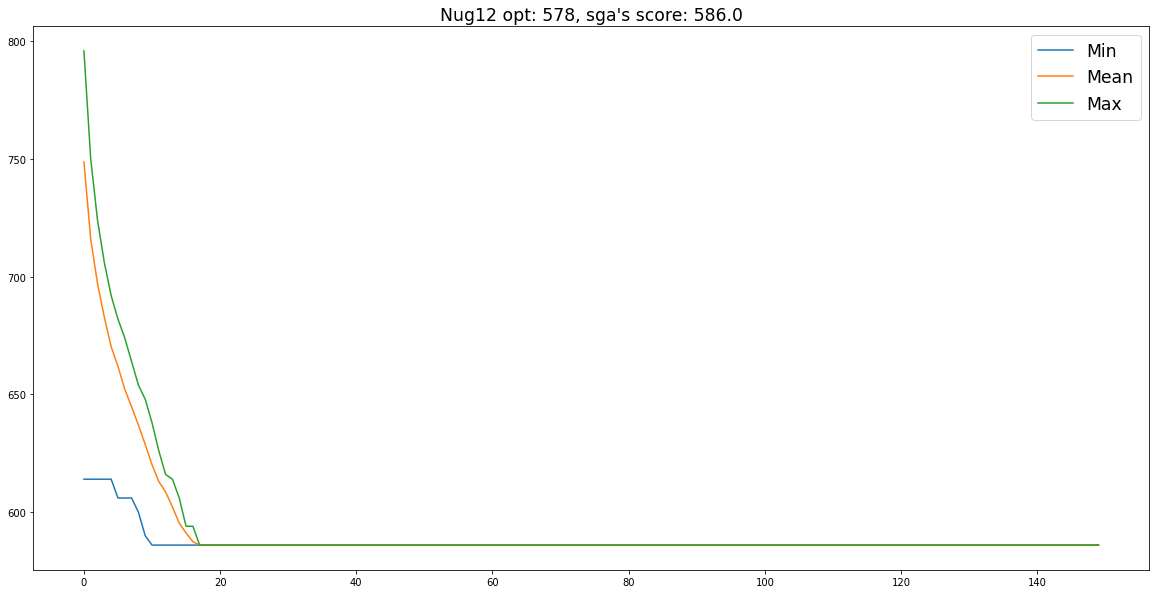

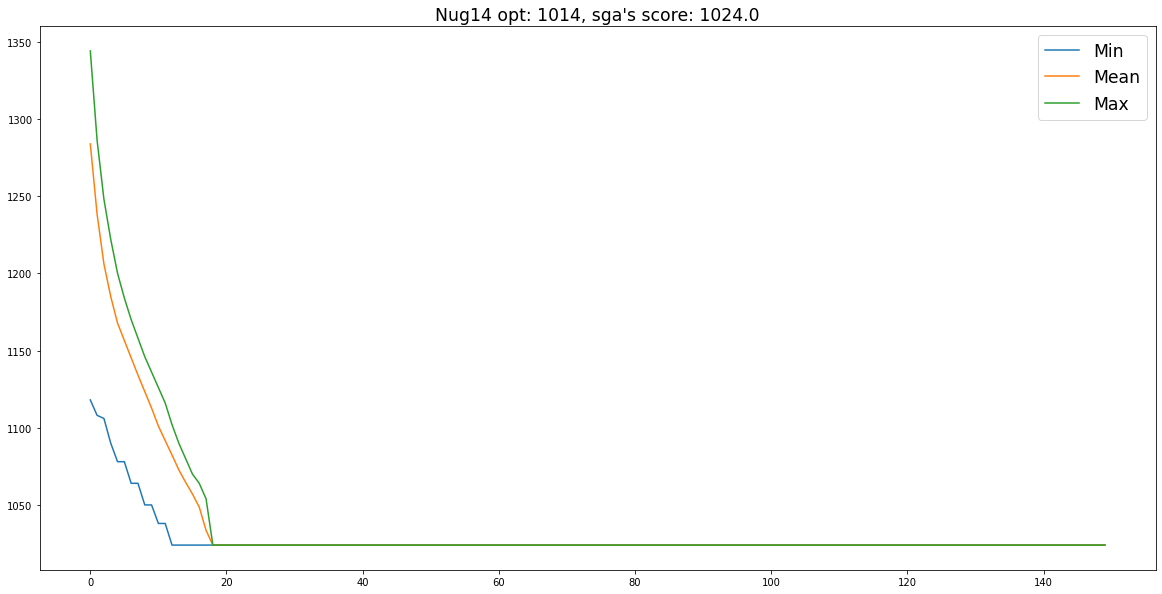

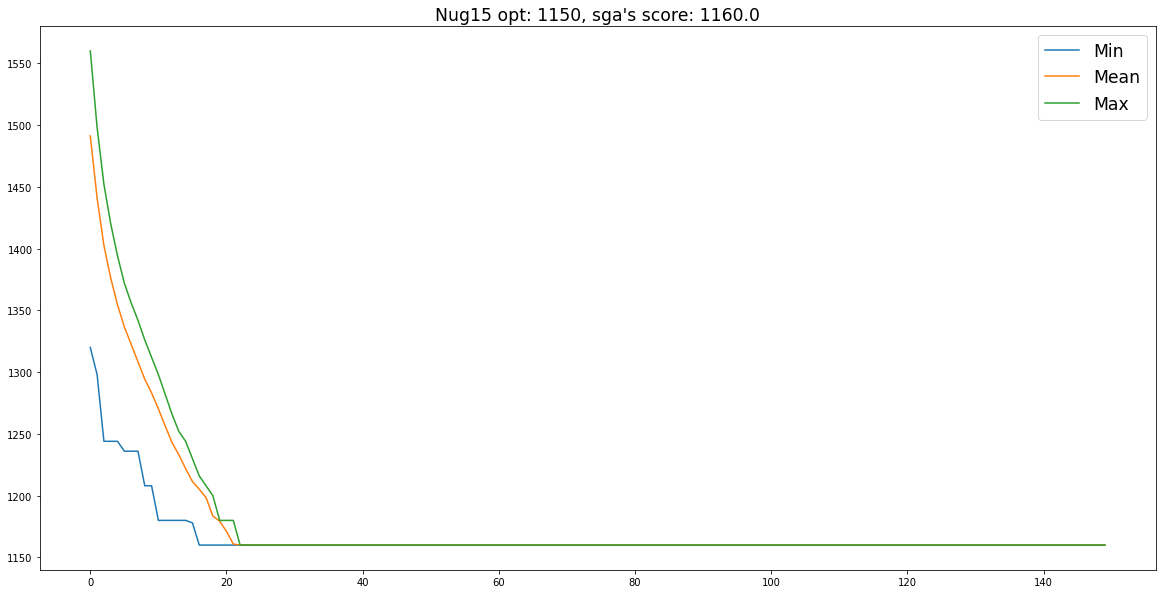

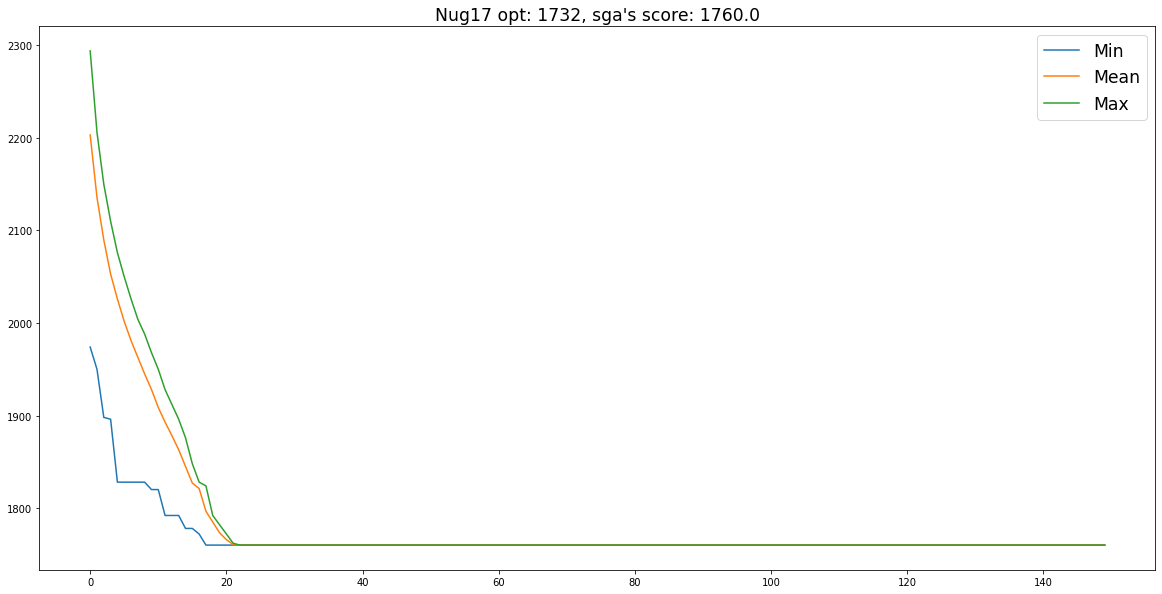

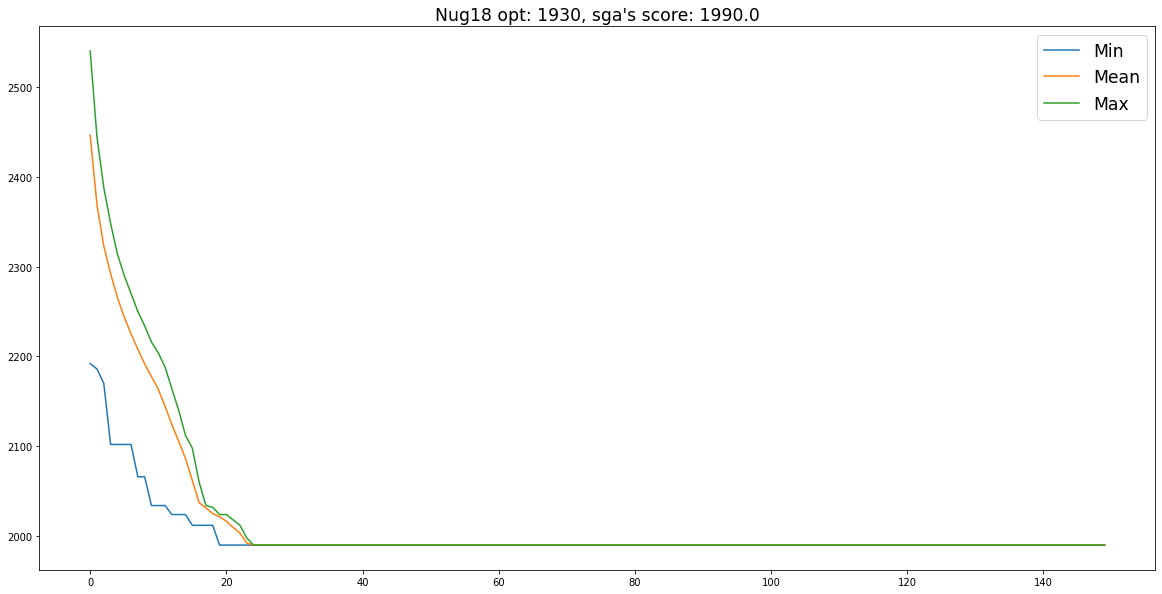

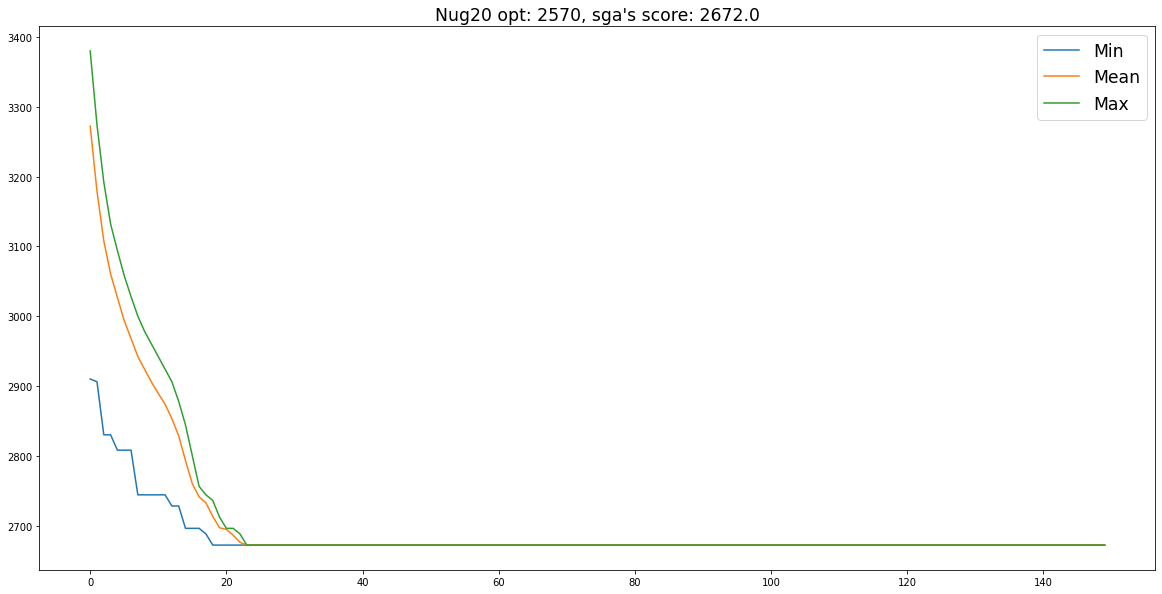

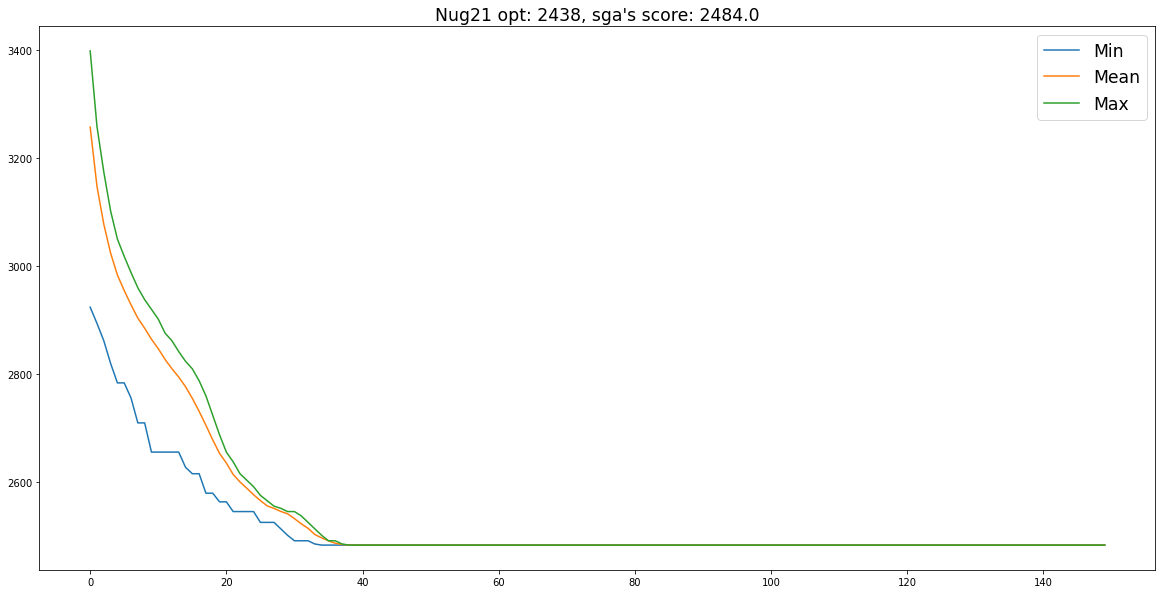

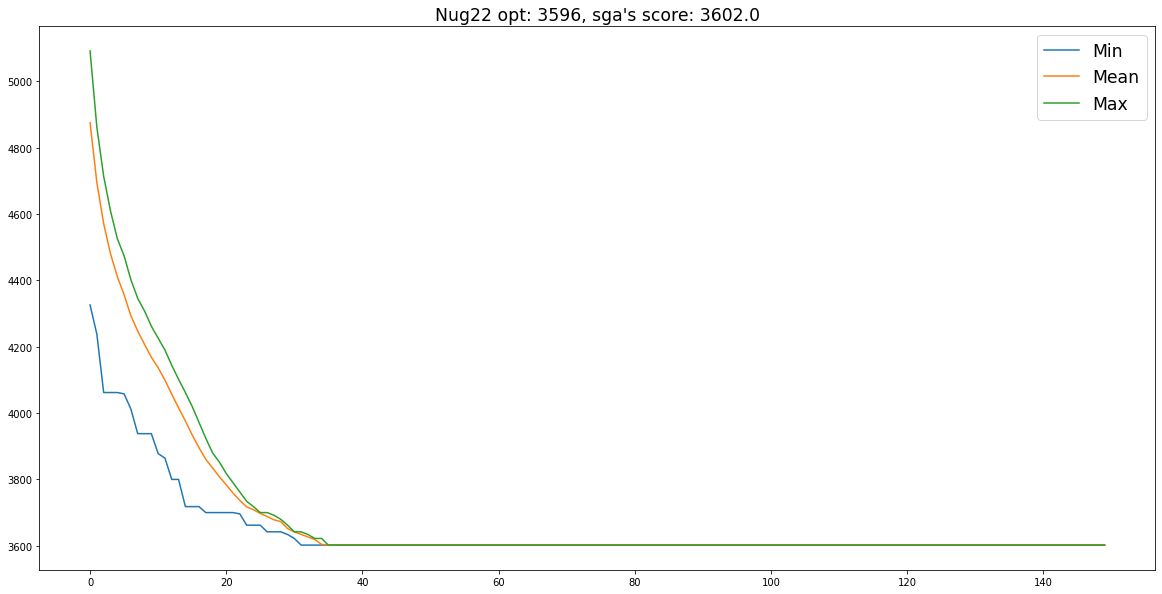

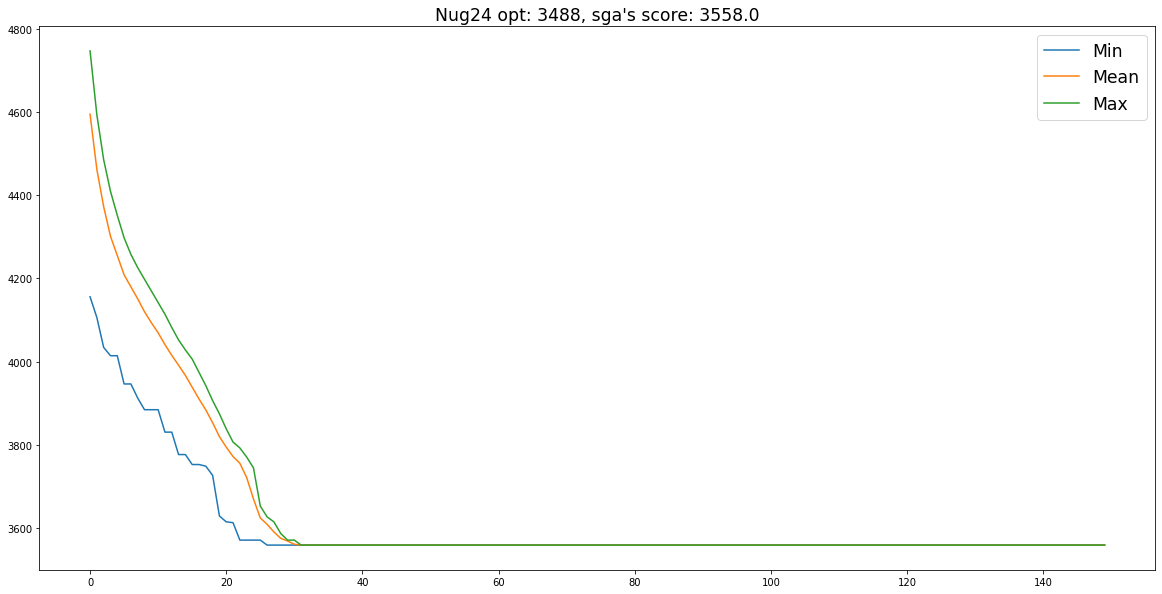

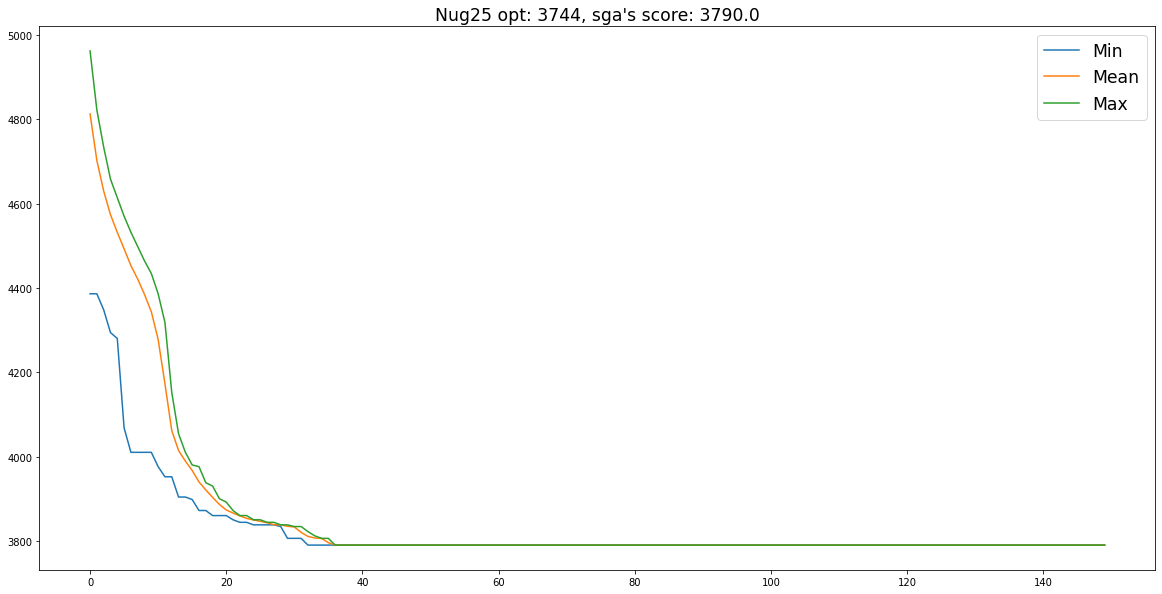

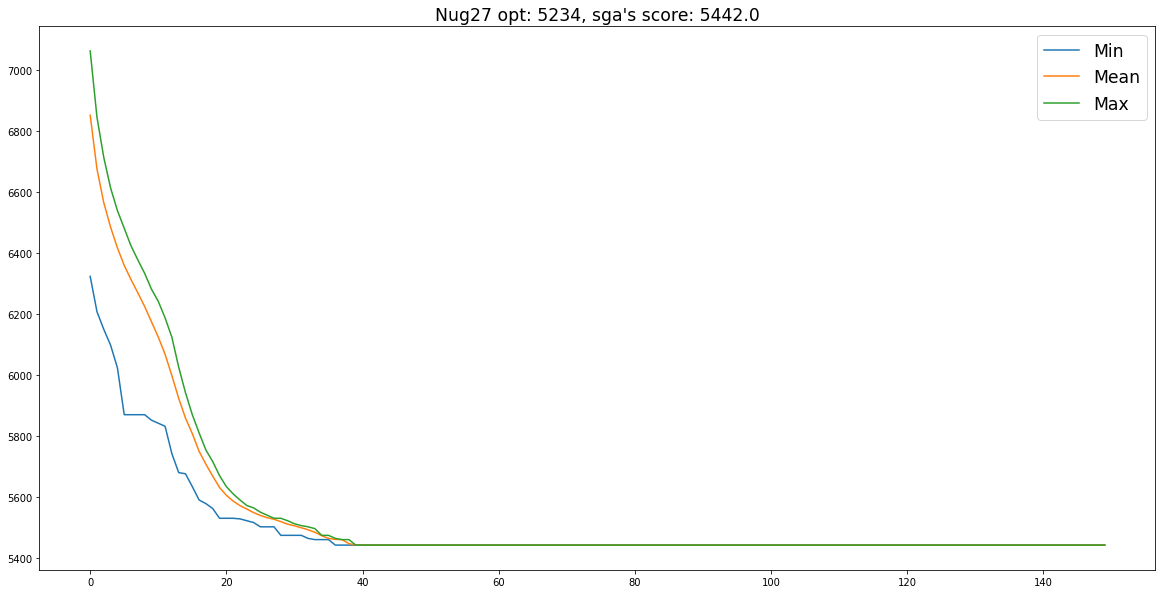

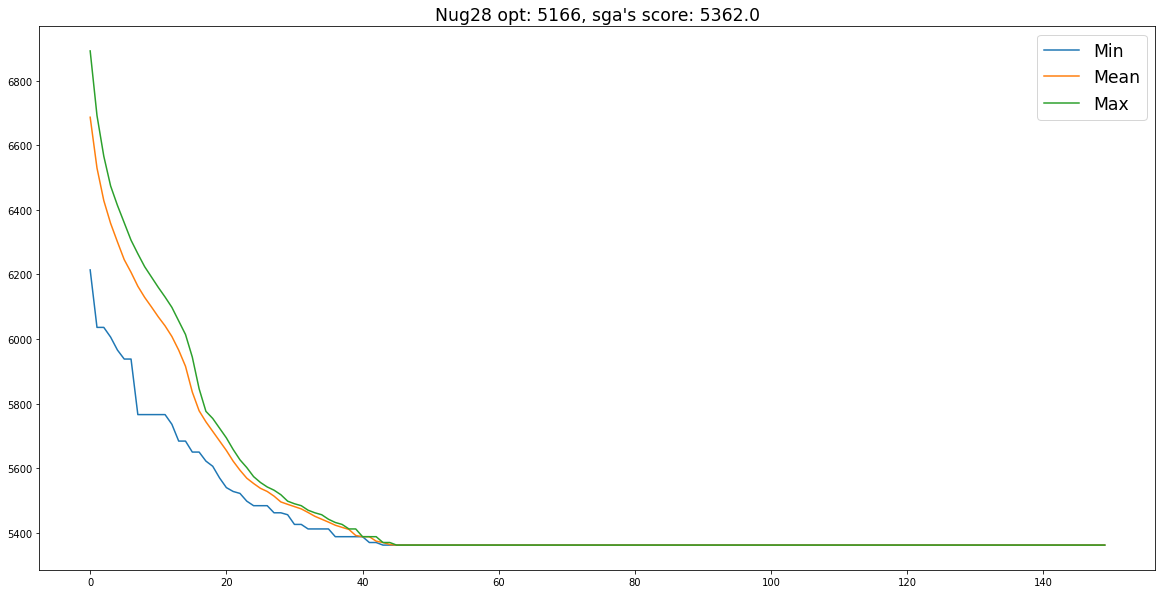

ValueError: cannot copy sequence with size 20 to array axis with dimension 30

In [60]:
for nug in qap_nug_instances:
   A, B, n = get_qap_instance(f'nug{nug}.dat')

   cost_values, current_population = SGA(
       number_of_iterations=150,
       distance_matrix=B,
       chromosome_length=n,
       crossover=PMX,
       mutation=lambda x: local_search_mutation(reverse_sequence_mutation(x), 1, A, B),
       objective_function=lambda x, y: qap_objective_function(x, A, y),
       debug=False
   )

   plt.figure(figsize=(20, 10))
   plt.plot(cost_values)
   plt.title(f'Nug{nug} opt: {opt[nug]}, sga\'s score: {cost_values[-1][0]}', fontsize='xx-large')
   plt.legend(['Min', 'Mean', 'Max'], fontsize='xx-large')
   plt.show()


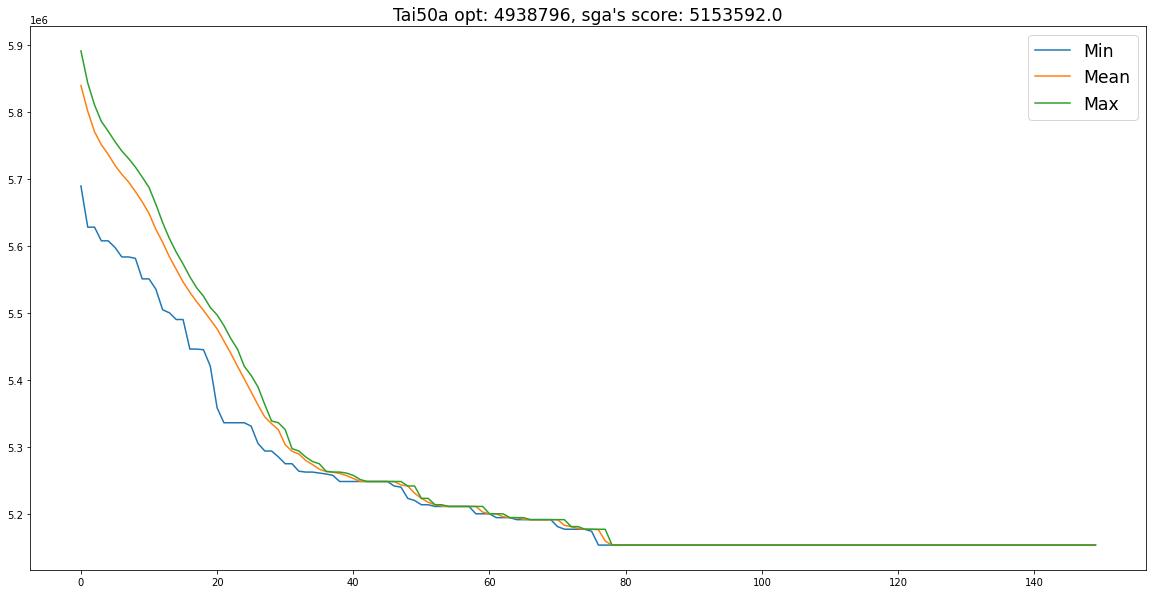

ValueError: cannot copy sequence with size 0 to array axis with dimension 60

In [61]:
for tai in qap_tai_instances:
   A, B, n = get_tai_instance(f'tai{tai}.dat')

   cost_values, current_population = SGA(
       number_of_iterations=150,
       distance_matrix=B,
       chromosome_length=n,
       crossover=PMX,
       mutation=lambda x: local_search_mutation(
           reverse_sequence_mutation(x), 1, A, B),
       objective_function=lambda x, y: qap_objective_function(x, A, y),
       debug=False
   )

   plt.figure(figsize=(20, 10))
   plt.plot(cost_values)
   plt.title(
       f'Tai{tai} opt: {opt[tai]}, sga\'s score: {cost_values[-1][0]}', fontsize='xx-large')
   plt.legend(['Min', 'Mean', 'Max'], fontsize='xx-large')
   plt.show()
